# Lending Club Case Study
## Below program is used to identify which all variables impacts the most in risk assesment

In [1]:
## Ignore Warings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

### Reading source file

In [2]:
loan_src_df=pd.read_csv("C:/Users/USER/Desktop/loan.csv",encoding = "ISO-8859-1",low_memory=False)

### Missing value analysis
1. Analyze the data and idenitfy which all column is useful for analysis.
2. Removing all the columns which has null value more than 60%, confirming if they are really not required for analysis.
3. Then filter out column which are only required for analysis.
4. Then based on the column and its amount of outlier need to use mean/mode/median. We find that we have lot of outlier hence used mode method to replace null values.

In [3]:
null_percentage = (loan_src_df.isna().sum()/len(loan_src_df))*100
null_percentage_df=null_percentage.reset_index()
null_percentage_df.columns=['column_name','null_percentage']
column_list_removing_nulls_greater_than_60=null_percentage_df.loc[null_percentage_df['null_percentage'] < 60,'column_name']
loan_src_df=loan_src_df[column_list_removing_nulls_greater_than_60.to_list()]

#### Below are the points to ponder based on the analysis
We need to drop the columns which are not significant effect on our analysis
 obeservations from data
 
  1. id---A unique LC assigned ID for the loan listing.
   these values are random numbers,so does not conribute to analysis
   
  2. member_id---A unique LC assigned Id for the borrower member.
   these values are also random numbers,so does not conribute to analysis
   
  3. funded_amnt---The total amount committed to that loan at that point in time.
   for this column is almost equivalent to loan_amnt.
   
  4. funded_amnt_inv---The total amount committed by investors for that loan at that point in time.
   value for this column is almost equivalent to funded_amnt.

  5. pymnt_plan---Indicates if a payment plan has been put in place for the loan
  value for entire dataset is 'n', therefore can be removed.
 
  6. url---URL for the LC page with listing data.
  is a URL for LC page for corresponding to each memberid, nothing to do with loan default.

  7. zip_code---first 3 digits of the 5 digit zip code are visible, 
   does not contribute to analysis
   
  8. delinq_amnt :The past-due amount owed for the accounts on which the borrower is now delinquent.
   value for entire dataset is '0', therefore can be removed.
  
  9. initial_list_status :The initial listing status of the loan. Possible values are – W, F
  value for entire dataset is 'f' out of the possible values, therefore can be removed.
  
  10. policy_code :publicly available policy_code=1 new products not publicly available policy_code=2
  value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be     removed.
  
  11. application_type :Indicates whether the loan is an individual application or a joint application with two co-borrowers
  value for entire dataset is 'INDIVIDUAL', therefore nothing to contribute for analysis, to be removed.
  
  12. acc_now_delinq :The number of accounts on which the borrower is now delinquent.
   value for entire dataset is '0', therefore can be removed.
 
 Dropping the above columns from the loan dataframe.
 
 #### Note:
 #### 1. Dropping all variables which are customer behaviour related 
 #### 2. We are also droping records whose loan status is current as the analysis is performed on historical data
 

In [4]:
loan_src_df=loan_src_df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership', 'annual_inc','verification_status', 'issue_d', 'loan_status', 'purpose', 'title','addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths','open_acc', 'pub_rec', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','pub_rec_bankruptcies']]
loan_src_df=loan_src_df[loan_src_df['loan_status']!='Current']
loan_src_df['loan_status'].unique()
null_percentage = (loan_src_df.isna().sum()/len(loan_src_df))*100
null_percentage_df=null_percentage.reset_index()
null_percentage_df.columns=['column_name','null_percentage']
null_percentage_df[null_percentage_df['null_percentage']>0]

,column_name,null_percentage
6,emp_title,6.185033
7,emp_length,2.677761
14,title,0.028514
32,last_pymnt_d,0.184047
34,last_credit_pull_d,0.005184
35,pub_rec_bankruptcies,1.806776


#### Missing value treatment
We are using mode method to replace the missing value so that values imputed is not affected by outliers

In [5]:
loan_src_df['pub_rec_bankruptcies']=loan_src_df['pub_rec_bankruptcies'].fillna(loan_src_df['pub_rec_bankruptcies'].mode()[0])
loan_src_df['emp_title']=loan_src_df['emp_title'].fillna(loan_src_df['emp_title'].mode()[0])
loan_src_df['last_credit_pull_d']=loan_src_df['last_credit_pull_d'].fillna(loan_src_df['last_credit_pull_d'].mode()[0])
loan_src_df['last_pymnt_d']=loan_src_df['last_pymnt_d'].fillna(loan_src_df['last_pymnt_d'].mode()[0])
loan_src_df['title']=loan_src_df['title'].fillna(loan_src_df['title'].mode()[0])
loan_src_df['emp_length']=loan_src_df['emp_length'].fillna(loan_src_df['emp_length'].mode()[0])

#### Data Manupulation
For the columns that is used for analysis few modifications are done to data so that it can be used easily

In [6]:
loan_src_df['term'] = loan_src_df['term'].map(lambda x: x.rstrip('months'))
loan_src_df['int_rate']=loan_src_df['int_rate'].map(lambda x: x.replace('%','')).astype(float)
#converting objective type data to timeline

loan_src_df.issue_d = pd.to_datetime(loan_src_df.issue_d, format='%b-%y')
loan_src_df.earliest_cr_line = pd.to_datetime(loan_src_df.earliest_cr_line, format='%b-%y')
loan_src_df.last_pymnt_d = pd.to_datetime(loan_src_df.last_pymnt_d, format='%b-%y')
loan_src_df.last_credit_pull_d = pd.to_datetime(loan_src_df.last_credit_pull_d, format='%b-%y')

#### Data Understanding
Checking distinct values

In [7]:
loan_src_df['pub_rec'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
loan_src_df['total_acc'].unique()

array([ 9,  4, 10, 37, 12, 11, 13,  3, 23, 34, 29, 28, 42, 14, 22, 38, 21,
       17,  7, 31, 44, 26, 16,  6, 18, 27, 25, 40, 35, 24,  8, 20, 15, 19,
       36, 51, 32, 30, 33, 46,  5, 61, 56, 50, 41, 79, 62, 43, 47, 53, 45,
       60, 55, 39, 52, 58, 54, 57, 49, 63, 48, 59, 77, 87, 75, 72, 64, 67,
       78, 76, 74, 66, 81, 90, 80, 71, 69, 73, 70, 68, 65,  2],
      dtype=int64)

In [9]:
loan_src_df['installment'].unique()

array([162.87,  59.83,  84.33, ...,  78.42, 275.38, 255.43])

In [10]:
loan_src_df['term'].unique()

array([' 36 ', ' 60 '], dtype=object)

In [11]:
loan_src_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [12]:
loan_src_df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [13]:
loan_src_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [14]:
loan_src_df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [15]:
loan_src_df['emp_title'].unique()

array(['US Army', 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

#### Idenitfication of categorical variables and continuous variables
Initially we split the column with string/ object data type  and int/float  data type column separately into a list

In [16]:
#categorical variables in a dateframe
cat_var = [key for key in dict(loan_src_df.dtypes)
             if dict(loan_src_df.dtypes)[key] in ['object'] ] # Categorical Varible

#numerical variable in dataframe
numeric_var=loan_src_df.select_dtypes(include=['int64', 'float64']).columns

cat_var = list(set(cat_var + ['pub_rec','pub_rec_bankruptcies','term','home_ownership','verification_status','purpose','addr_state']))
continuous_var=[item for item in numeric_var if item not in cat_var]
loan_src_df.shape

(38577, 36)

#### Outlier Treatment
Based on boxplot for continuous variables identified, outliers are identified and treated individually.
Outlier treatment is done using cube root/logrithm transformation.
Method for each column is idenitified iteratively by transforming and ploting box plot

In [17]:
f = lambda x: np.sign(x) * np.power(abs(x), 1./3)
q = lambda x: np.sign(x) * np.power(abs(x), 1./2)
loan_src_df['orig_loan_amnt']=loan_src_df['loan_amnt']
loan_src_df['orig_annual_inc'] =loan_src_df['annual_inc']
loan_src_df['orig_installment'] =loan_src_df['installment']
loan_src_df['orig_total_pymnt'] =loan_src_df['total_pymnt']
loan_src_df['orig_total_pymnt_inv'] =loan_src_df['total_pymnt_inv']
loan_src_df['loan_amnt'] =loan_src_df['loan_amnt'].apply(f)
loan_src_df['installment'] =loan_src_df['installment'].apply(f)
loan_src_df['annual_inc'] =np.log(loan_src_df['annual_inc'])
loan_src_df['total_pymnt'] = loan_src_df['total_pymnt'].apply(f)
loan_src_df['total_pymnt_inv'] =loan_src_df['total_pymnt_inv'].apply(f)
loan_src_df['last_pymnt_amnt'] =loan_src_df['last_pymnt_amnt'].apply(f)
loan_src_df['total_rec_late_fee'] =loan_src_df['total_rec_late_fee'].apply(f)

#### Post data transformation IQR method is used further to remove the oulier values

In [18]:
loan_IQR_df=loan_src_df[['loan_amnt','annual_inc','last_pymnt_amnt','total_pymnt_inv','total_pymnt','last_pymnt_amnt','total_rec_late_fee']]
Q1=loan_IQR_df.quantile(.25)
Q3=loan_IQR_df.quantile(.75)
IQR=loan_IQR_df.quantile(.75)-loan_IQR_df.quantile(.25)
loan_src_df=loan_src_df.loc[~((loan_IQR_df < (Q1 - 1.5 * IQR)) |(loan_IQR_df > (Q3 + 1.5 * IQR))).any(axis=1)]
loan_src_df.shape

(35448, 41)

#### Below are the box plots for the continuous variable which are required for analysis
Post the scaling and IQR we find the outliers are removed for the loan amount

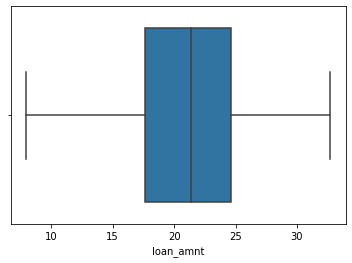

In [19]:
ax=sns.boxplot(loan_src_df['loan_amnt'])

Post the scaling and IQR we find the outliers are removed for the annual income

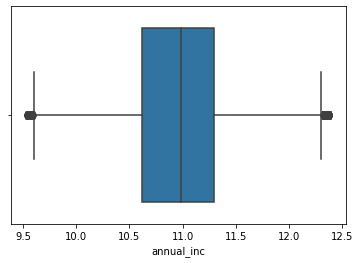

In [20]:
ax=sns.boxplot(loan_src_df['annual_inc'])

Post the scaling and IQR we find the outliers are removed for dti

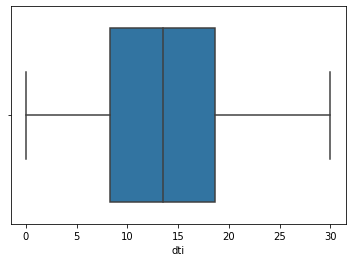

In [21]:
ax=sns.boxplot(loan_src_df['dti'])

Post the scaling and IQR we find the outliers are removed for the total payment

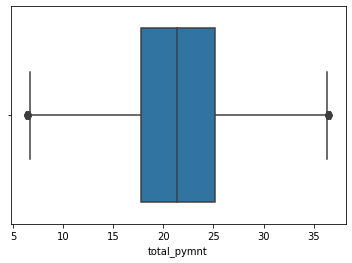

In [22]:
ax=sns.boxplot(loan_src_df['total_pymnt'])

Post the scaling and IQR we find the outliers are removed for the total payment inv

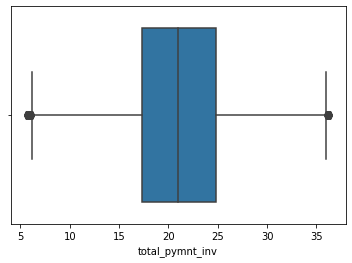

In [23]:
ax=sns.boxplot(loan_src_df['total_pymnt_inv'])

Post the scaling and IQR we find the outliers are removed for the last payment amount

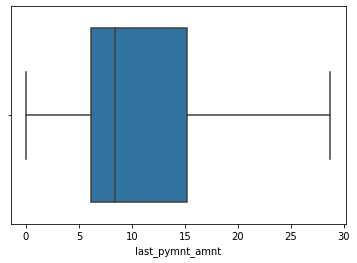

In [24]:
ax=sns.boxplot(loan_src_df['last_pymnt_amnt'])

Post the scaling and IQR we find the outliers are removed for the loan amount

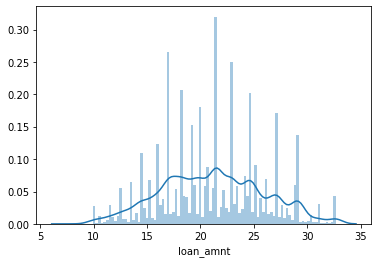

In [25]:
ax=sns.distplot(loan_src_df['loan_amnt'],bins=100)

Post the scaling and IQR we find the outliers are removed for the dti

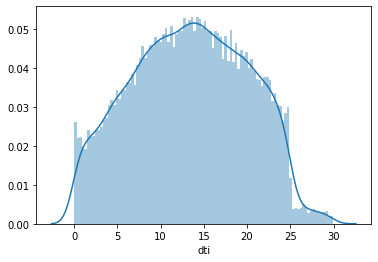

In [26]:
ax=sns.distplot(loan_src_df['dti'],bins=100)

Below is the scatter plot between loan amount and loan purpose column, which can help us identify charge off based on record count

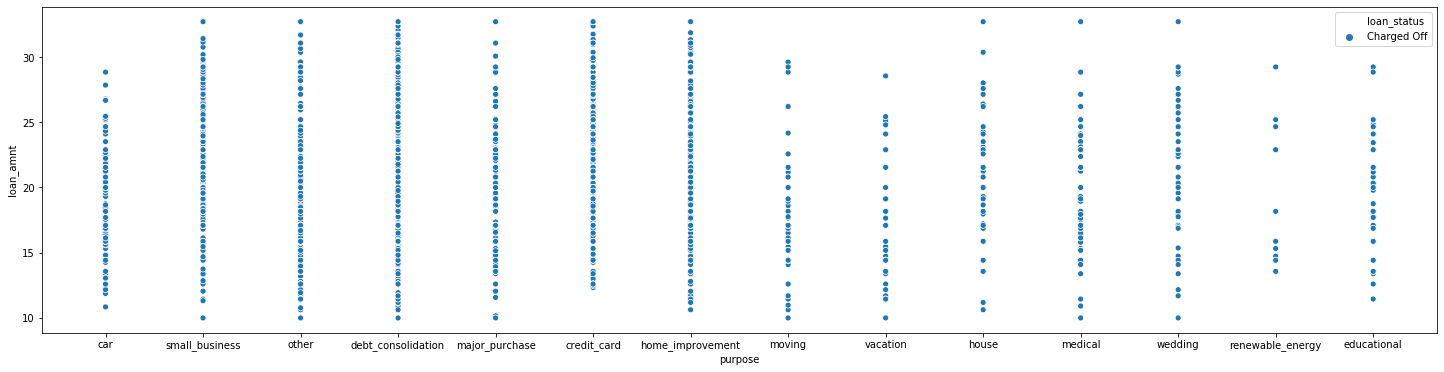

In [27]:
plt.figure(figsize=(25, 6))
sns.scatterplot(loan_src_df['purpose'],loan_src_df['loan_amnt'],hue=loan_src_df.loc[loan_src_df['loan_status']=='Charged Off','loan_status'])

#### Below are the short note on further steps
Here our target variable is loan status.

Try to find the relation between loan status with the other variables. And inter relationship with other variables.

Between two categorical variables use cross tab.

Between a categorical and numeric use bar plot.

Between two numerical use rel plot or heat map for multiple variables.

#### Bivariate Analysis - Between Continuous Variables

Below is the scatter plot between loan amount and grade which can help us identify the chargeoff intensity based on record count

Text(0.5, 1.0, 'Scatter plot showing the count of load status for each grade')

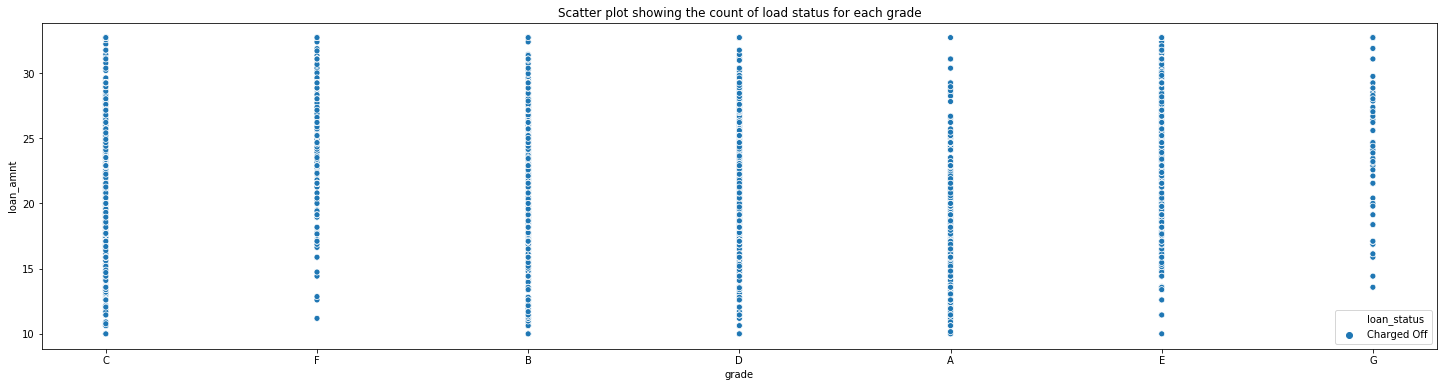

In [28]:
plt.figure(figsize=(25, 6))
sns.scatterplot(loan_src_df['grade'],loan_src_df['loan_amnt'],hue=loan_src_df.loc[loan_src_df['loan_status']=='Charged Off','loan_status'])
plt.title('Scatter plot showing the count of load status for each grade')

Counter plot is plotted between loan status and count of its occurances

Text(0.5, 1.0, 'Counter plot showing the count of load status from the dataset')

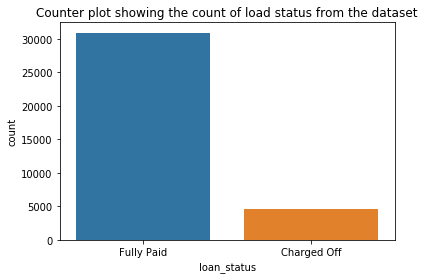

In [29]:
ax=sns.countplot(loan_src_df['loan_status'])
plt.title('Counter plot showing the count of load status from the dataset')

Below plot illustrates the record of occurances (based on record count) of different loan status for every loan purpose provided

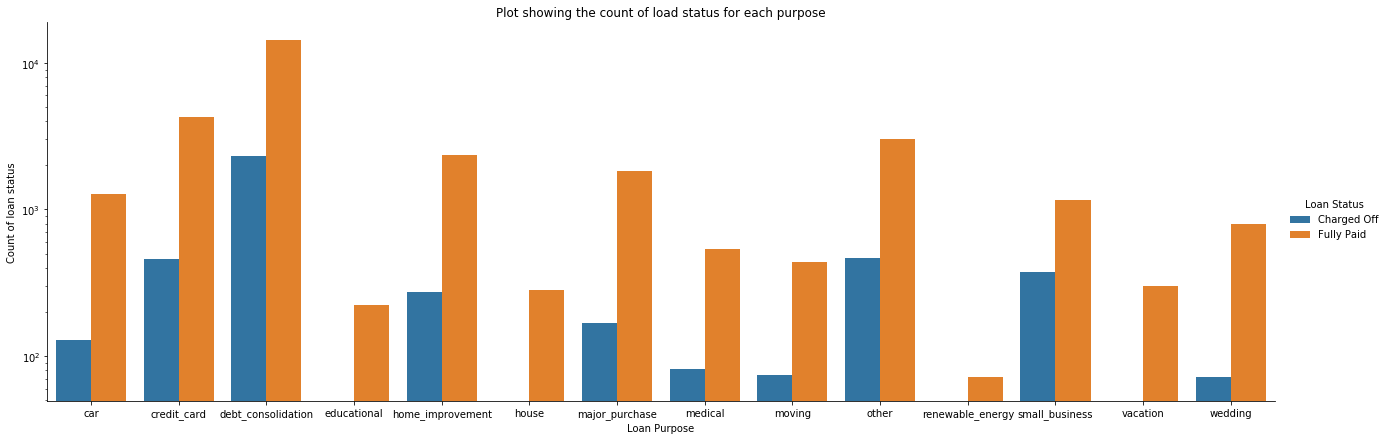

In [30]:
purpose_analysis=loan_src_df.groupby(['purpose','loan_status'])['purpose','loan_status'].agg(['count'])
purpose_analysis=purpose_analysis['purpose'].reset_index()
purpose_analysis.columns=['Loan Purpose','Loan Status','Count of loan status']

sns.catplot(x="Loan Purpose", y="Count of loan status", hue="Loan Status", kind="bar", data=purpose_analysis,size=6,aspect=3,log=True)
plt.title('Plot showing the count of load status for each purpose')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every loan purpose provided (based on percentage computed with the sub group)

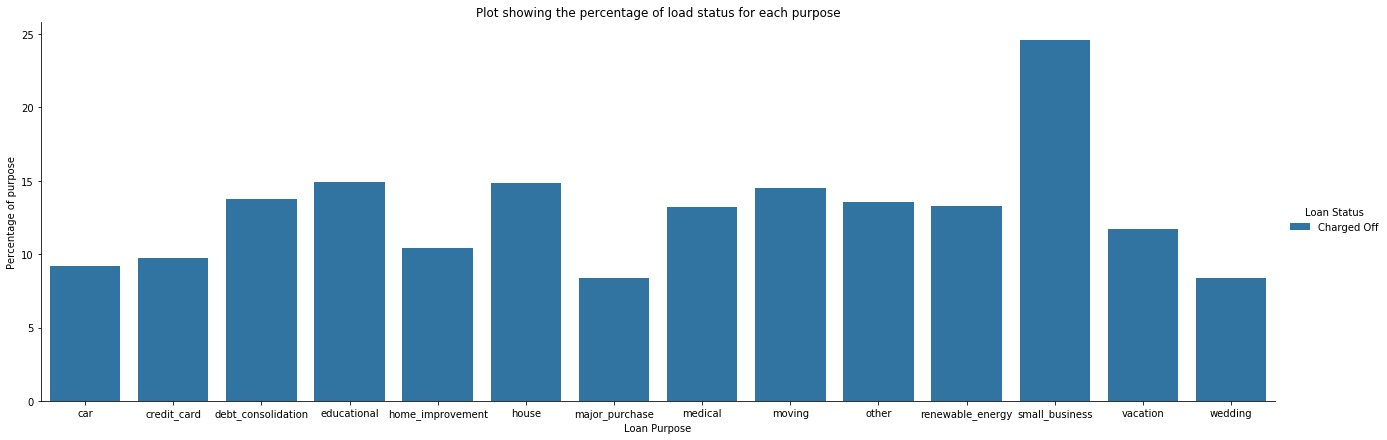

In [31]:
purpose_sum_analysis=purpose_analysis.groupby(['Loan Purpose']).sum().reset_index()
purpose_sum_analysis.columns=['Loan Purpose','Total count']
purpose_perc_analysis=pd.merge(purpose_analysis,purpose_sum_analysis,left_on='Loan Purpose',right_on='Loan Purpose',how='inner')
purpose_perc_analysis['Percentage of purpose']=(purpose_perc_analysis['Count of loan status']/purpose_perc_analysis['Total count'])*100
purpose_perc_analysis=purpose_perc_analysis[purpose_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Loan Purpose", y="Percentage of purpose", hue="Loan Status", kind="bar", data=purpose_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each purpose')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every loan grade provided

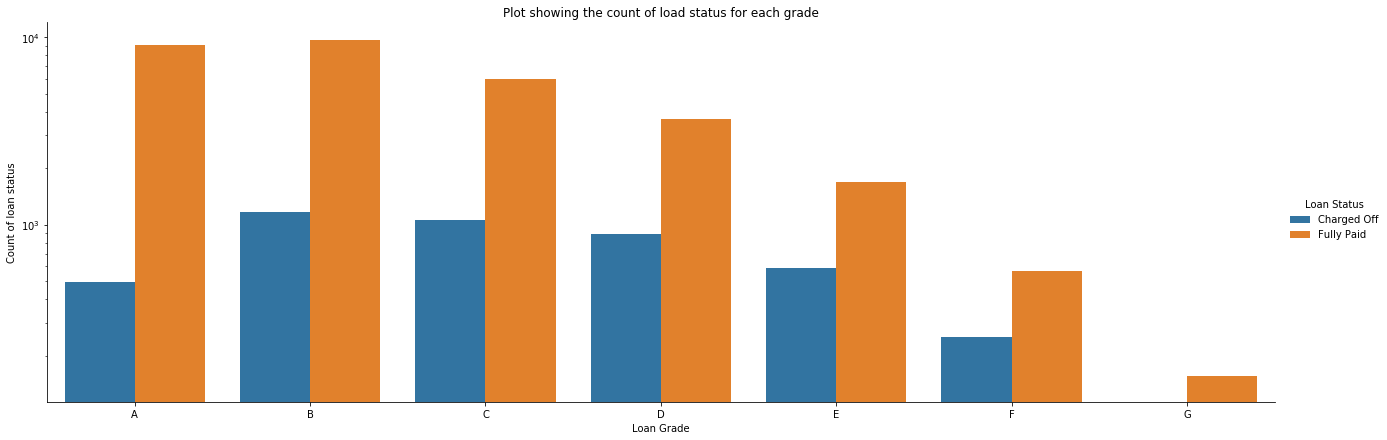

In [32]:
grade_analysis=loan_src_df.groupby(['grade','loan_status'])['grade','loan_status'].agg(['count'])
grade_analysis=grade_analysis['grade'].reset_index()
grade_analysis.columns=['Loan Grade','Loan Status','Count of loan status']

sns.catplot(x="Loan Grade", y="Count of loan status", hue="Loan Status", kind="bar", data=grade_analysis,size=6,aspect=3,log=True)
plt.title('Plot showing the count of load status for each grade')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every loan grade provided (based on percentage computed with the sub group)

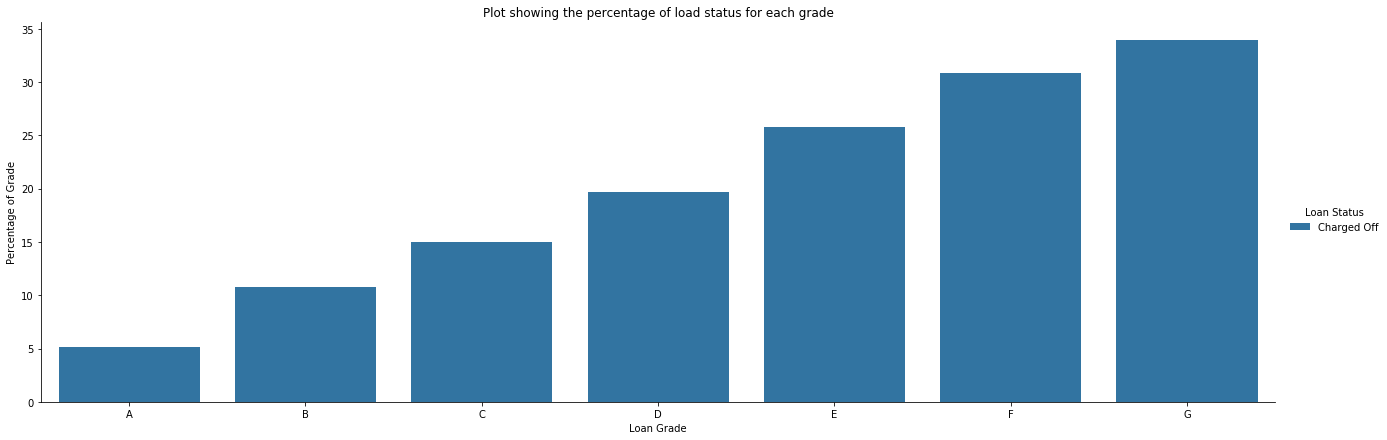

In [33]:
grade_sum_analysis=grade_analysis.groupby(['Loan Grade']).sum().reset_index()
grade_sum_analysis.columns=['Loan Grade','Total count']
grade_perc_analysis=pd.merge(grade_analysis,grade_sum_analysis,left_on='Loan Grade',right_on='Loan Grade',how='inner')
grade_perc_analysis['Percentage of Grade']=(grade_perc_analysis['Count of loan status']/grade_perc_analysis['Total count'])*100
grade_perc_analysis=grade_perc_analysis[grade_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Loan Grade", y="Percentage of Grade", hue="Loan Status", kind="bar", data=grade_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each grade')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every loan sub grade provided

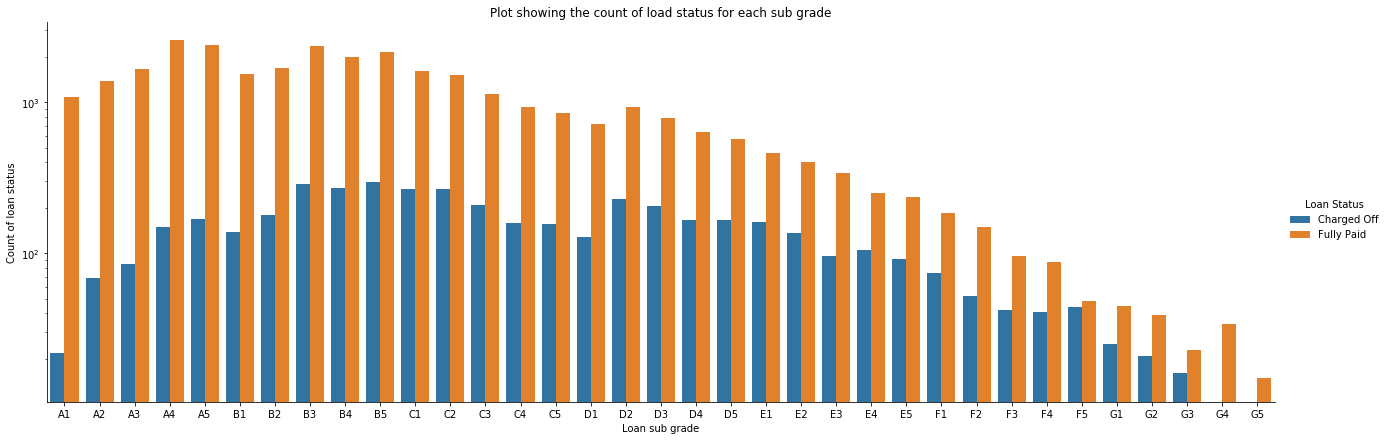

In [34]:
sub_grade_analysis=loan_src_df.groupby(['sub_grade','loan_status'])['sub_grade','loan_status'].agg(['count'])
sub_grade_analysis=sub_grade_analysis['sub_grade'].reset_index()
sub_grade_analysis.columns=['Loan sub grade','Loan Status','Count of loan status']

sns.catplot(x="Loan sub grade", y="Count of loan status", hue="Loan Status", kind="bar", data=sub_grade_analysis,size=6,aspect=3,log=True)
plt.title('Plot showing the count of load status for each sub grade')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every loan sub grade provided (based on percentage computed with the sub group)

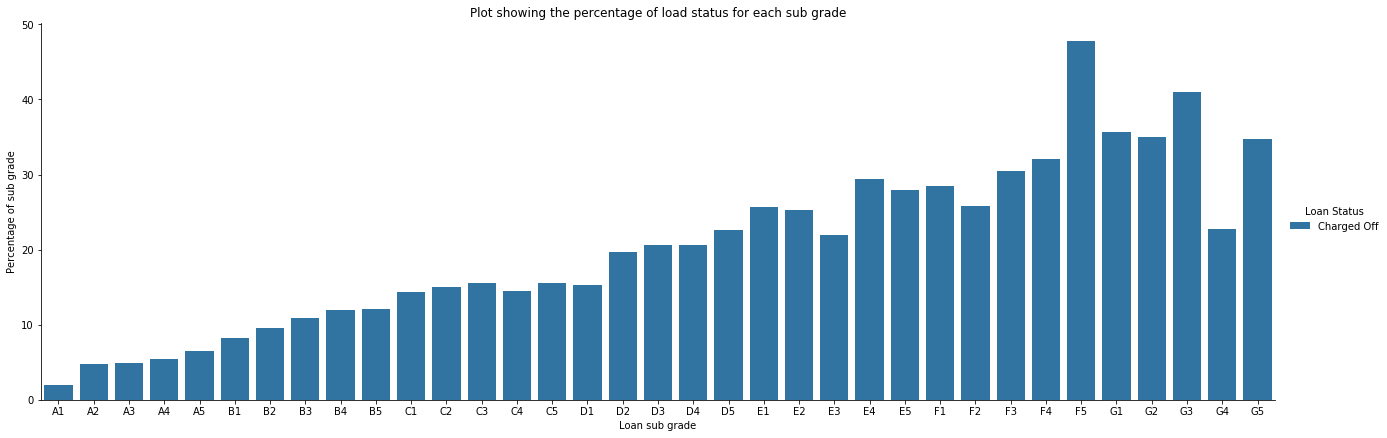

In [35]:
sub_grade_sum_analysis=sub_grade_analysis.groupby(['Loan sub grade']).sum().reset_index()
sub_grade_sum_analysis.columns=['Loan sub grade','Total count']
sub_grade_perc_analysis=pd.merge(sub_grade_analysis,sub_grade_sum_analysis,left_on='Loan sub grade',right_on='Loan sub grade',how='inner')
sub_grade_perc_analysis['Percentage of sub grade']=(sub_grade_perc_analysis['Count of loan status']/sub_grade_perc_analysis['Total count'])*100
sub_grade_perc_analysis=sub_grade_perc_analysis[sub_grade_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Loan sub grade", y="Percentage of sub grade", hue="Loan Status", kind="bar", data=sub_grade_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each sub grade')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every public record bankruptcies provided

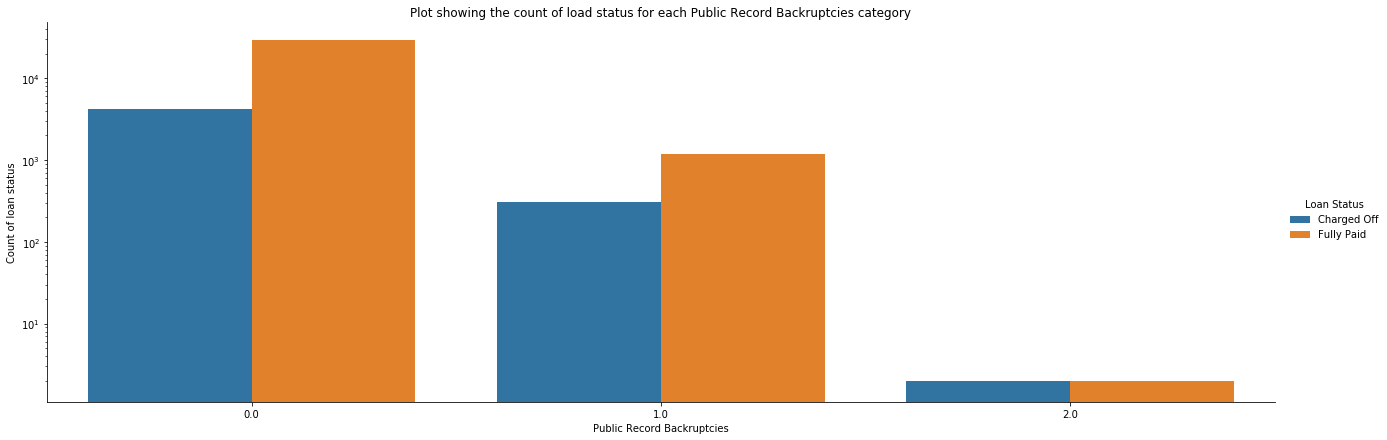

In [36]:
pub_rec_bankruptcies_analysis=loan_src_df.groupby(['pub_rec_bankruptcies','loan_status'])['pub_rec_bankruptcies','loan_status'].agg(['count'])
pub_rec_bankruptcies_analysis=pub_rec_bankruptcies_analysis['pub_rec_bankruptcies'].reset_index()
pub_rec_bankruptcies_analysis.columns=['Public Record Backruptcies','Loan Status','Count of loan status']

sns.catplot(x="Public Record Backruptcies", y="Count of loan status", hue="Loan Status", kind="bar", data=pub_rec_bankruptcies_analysis,size=6,aspect=3,log=True)
plt.title('Plot showing the count of load status for each Public Record Backruptcies category')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every public record bankruptcies provided (based on percentage computed with the sub group)

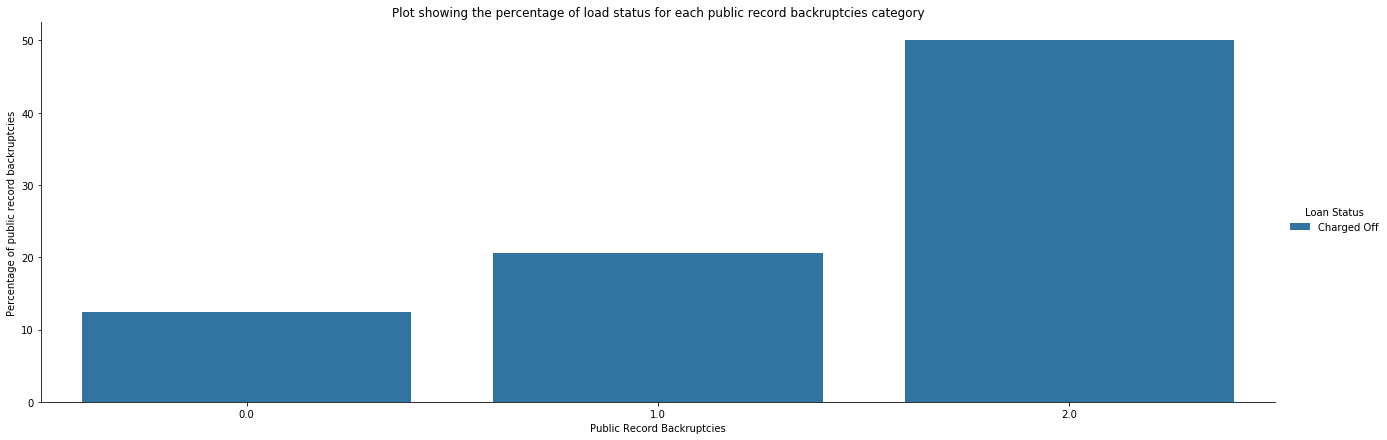

In [37]:
pub_rec_bankruptcies_sum_analysis=pub_rec_bankruptcies_analysis.groupby(['Public Record Backruptcies']).sum().reset_index()
pub_rec_bankruptcies_sum_analysis.columns=['Public Record Backruptcies','Total count']
pub_rec_bankruptcies_perc_analysis=pd.merge(pub_rec_bankruptcies_analysis,pub_rec_bankruptcies_sum_analysis,left_on='Public Record Backruptcies',right_on='Public Record Backruptcies',how='inner')
pub_rec_bankruptcies_perc_analysis['Percentage of public record backruptcies']=(pub_rec_bankruptcies_perc_analysis['Count of loan status']/pub_rec_bankruptcies_perc_analysis['Total count'])*100
pub_rec_bankruptcies_perc_analysis=pub_rec_bankruptcies_perc_analysis[pub_rec_bankruptcies_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Public Record Backruptcies", y="Percentage of public record backruptcies", hue="Loan Status", kind="bar", data=pub_rec_bankruptcies_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each public record backruptcies category')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every home ownership provided

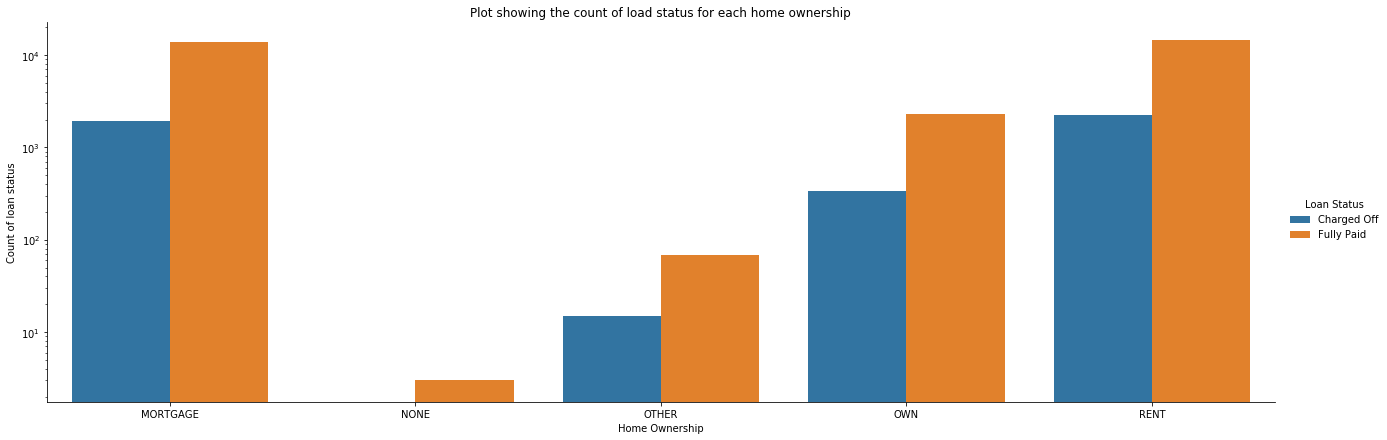

In [38]:
home_ownership_analysis=loan_src_df.groupby(['home_ownership','loan_status'])['home_ownership','loan_status'].agg(['count'])
home_ownership_analysis=home_ownership_analysis['home_ownership'].reset_index()
home_ownership_analysis.columns=['Home Ownership','Loan Status','Count of loan status']

sns.catplot(x="Home Ownership", y="Count of loan status", hue="Loan Status", kind="bar", data=home_ownership_analysis,size=6,aspect=3,log=True)
plt.title('Plot showing the count of load status for each home ownership')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every home ownership provided (based on percentage computed with the sub group)

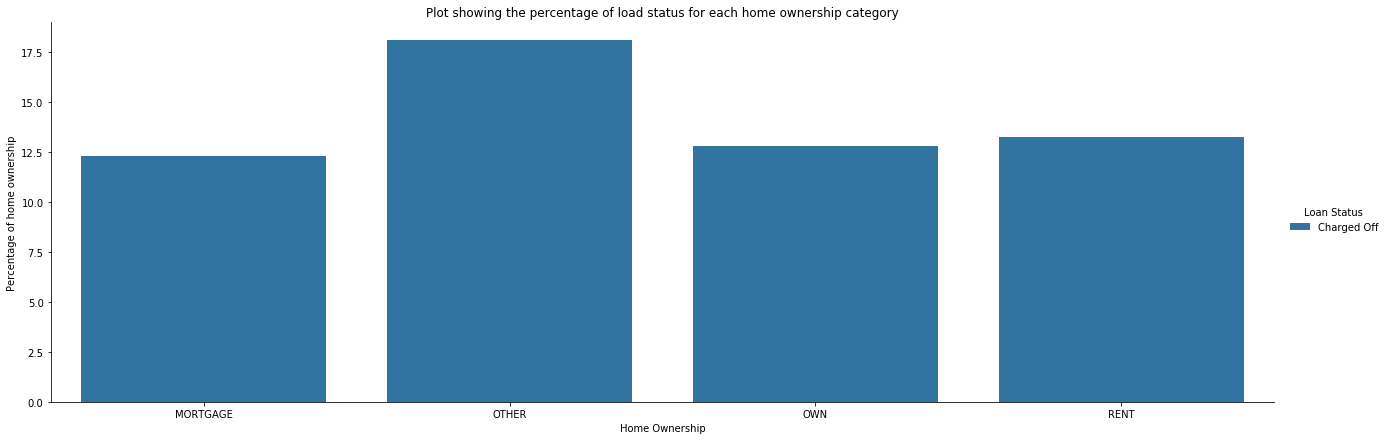

In [39]:
home_ownership_sum_analysis=home_ownership_analysis.groupby(['Home Ownership']).sum().reset_index()
home_ownership_sum_analysis.columns=['Home Ownership','Total count']
home_ownership_perc_analysis=pd.merge(home_ownership_analysis,home_ownership_sum_analysis,left_on='Home Ownership',right_on='Home Ownership',how='inner')
home_ownership_perc_analysis['Percentage of home ownership']=(home_ownership_perc_analysis['Count of loan status']/home_ownership_perc_analysis['Total count'])*100
home_ownership_perc_analysis=home_ownership_perc_analysis[home_ownership_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Home Ownership", y="Percentage of home ownership", hue="Loan Status", kind="bar", data=home_ownership_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each home ownership category')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every loan duration provided

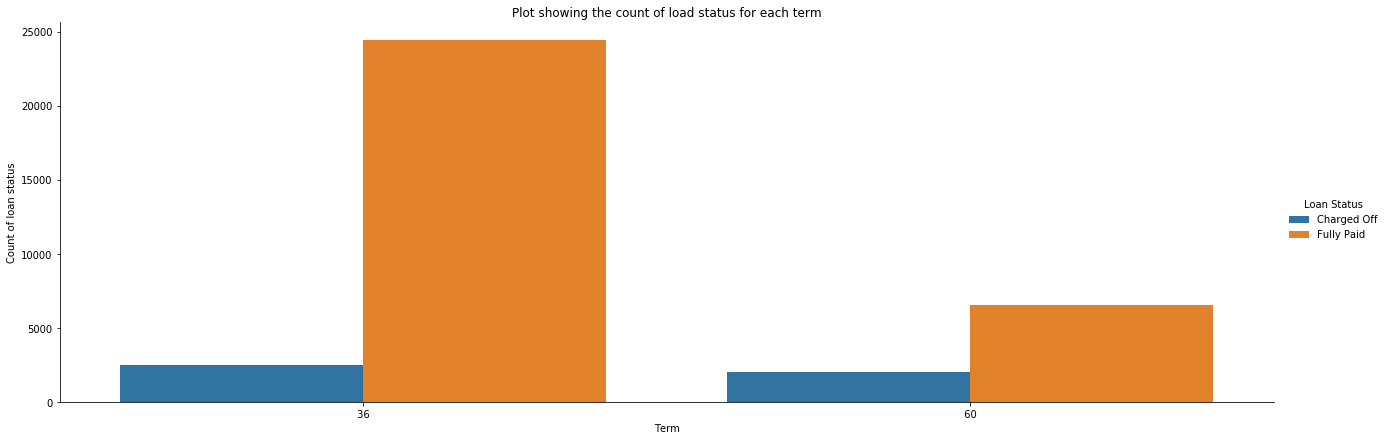

In [40]:
term_analysis=loan_src_df.groupby(['term','loan_status'])['term','loan_status'].agg(['count'])
term_analysis=term_analysis['term'].reset_index()
term_analysis.columns=['Term','Loan Status','Count of loan status']

sns.catplot(x="Term", y="Count of loan status", hue="Loan Status", kind="bar", data=term_analysis,size=6,aspect=3)
plt.title('Plot showing the count of load status for each term')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every loan duration provided (based on percentage computed with the sub group)

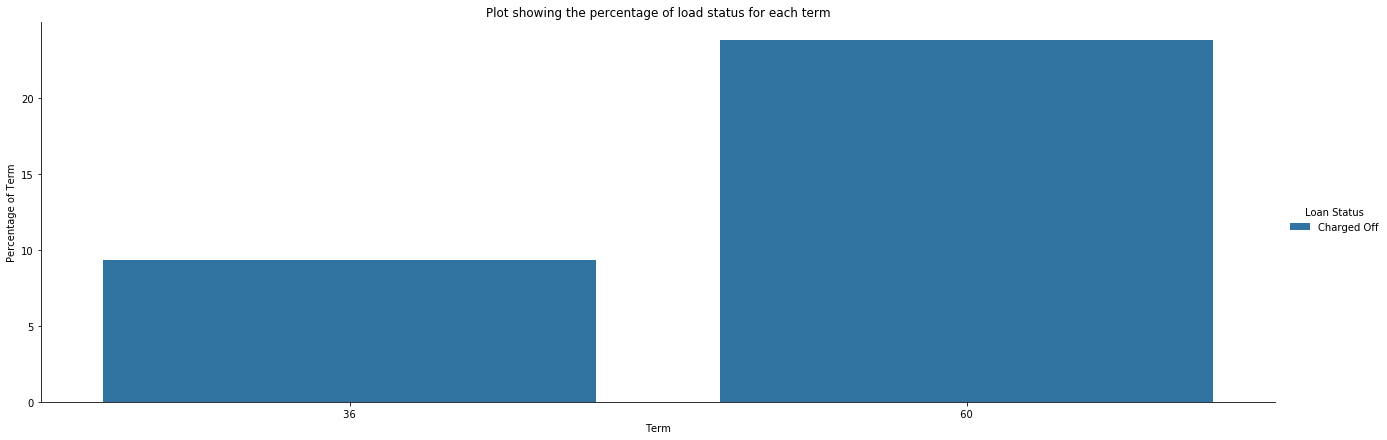

In [41]:
term_sum_analysis=term_analysis.groupby(['Term']).sum().reset_index()
term_sum_analysis.columns=['Term','Total count']
term_perc_analysis=pd.merge(term_analysis,term_sum_analysis,left_on='Term',right_on='Term',how='inner')
term_perc_analysis['Percentage of Term']=(term_perc_analysis['Count of loan status']/term_perc_analysis['Total count'])*100
term_perc_analysis=term_perc_analysis[term_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Term", y="Percentage of Term", hue="Loan Status", kind="bar", data=term_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each term')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every employment duration provided

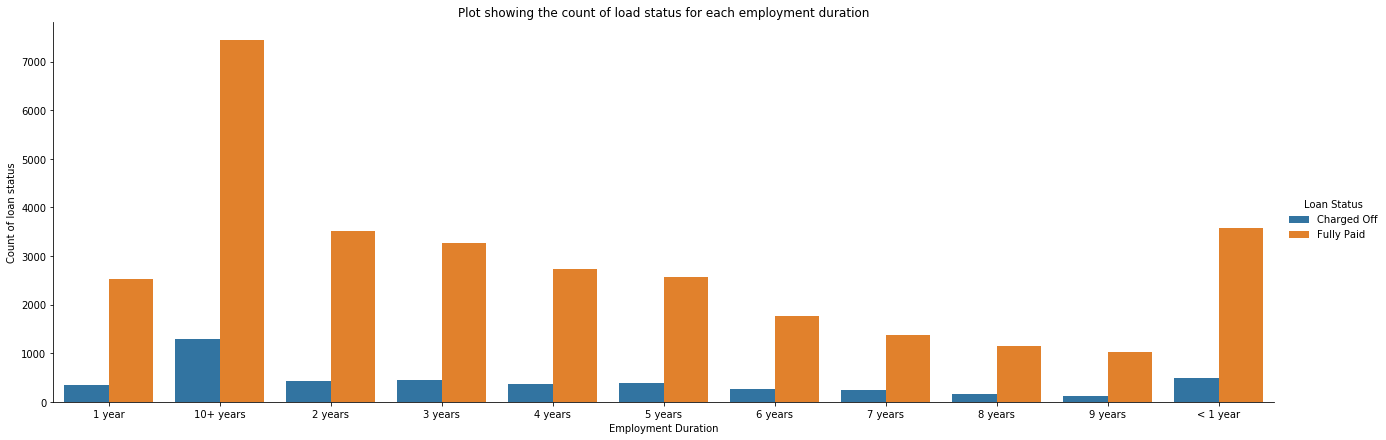

In [42]:
emp_length_analysis=loan_src_df.groupby(['emp_length','loan_status'])['emp_length','loan_status'].agg(['count'])
emp_length_analysis=emp_length_analysis['emp_length'].reset_index()
emp_length_analysis.columns=['Employment Duration','Loan Status','Count of loan status']

sns.catplot(x="Employment Duration", y="Count of loan status", hue="Loan Status", kind="bar", data=emp_length_analysis,size=6,aspect=3)
plt.title('Plot showing the count of load status for each employment duration')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every employment duration provided (based on percentage computed with the sub group)

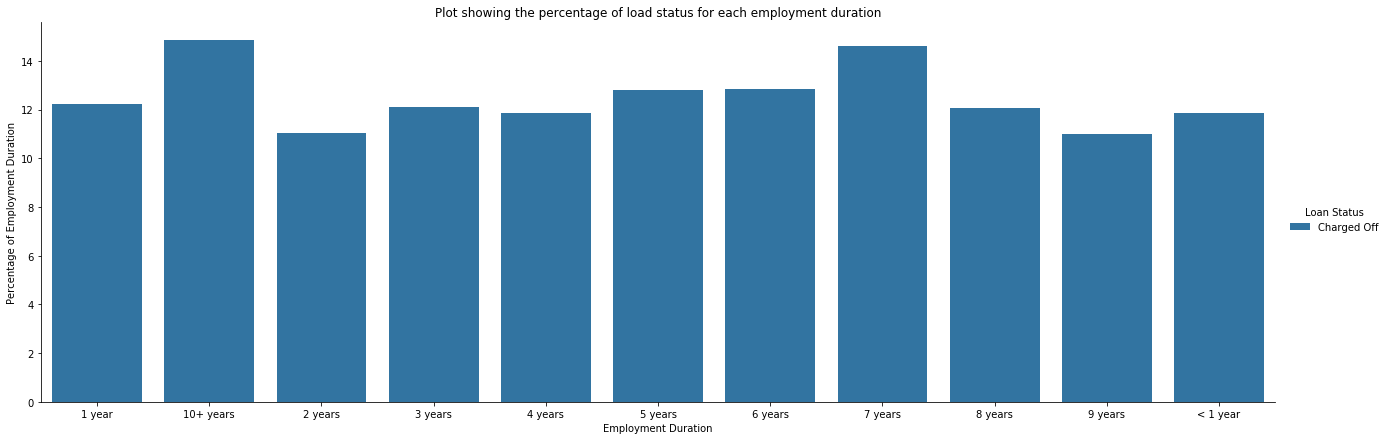

In [43]:
emp_length_sum_analysis=emp_length_analysis.groupby(['Employment Duration']).sum().reset_index()
emp_length_sum_analysis.columns=['Employment Duration','Total count']
emp_length_perc_analysis=pd.merge(emp_length_analysis,emp_length_sum_analysis,left_on='Employment Duration',right_on='Employment Duration',how='inner')
emp_length_perc_analysis['Percentage of Employment Duration']=(emp_length_perc_analysis['Count of loan status']/emp_length_perc_analysis['Total count'])*100
emp_length_perc_analysis=emp_length_perc_analysis[emp_length_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Employment Duration", y="Percentage of Employment Duration", hue="Loan Status", kind="bar", data=emp_length_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each employment duration')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every interest rate range provided

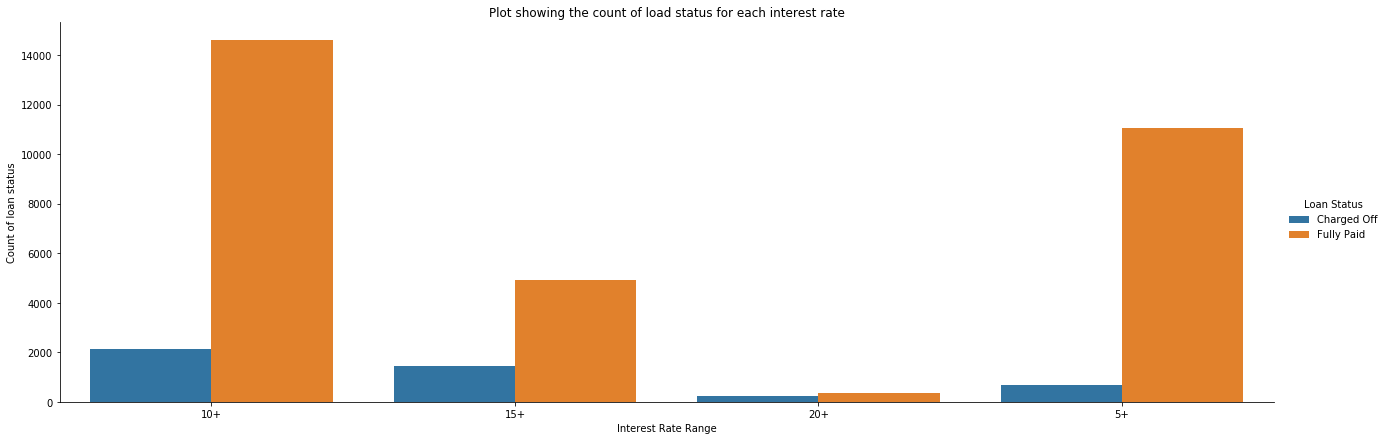

In [44]:
loan_src_df['Interest Rate Range']='NA'
loan_src_df.loc[(loan_src_df['int_rate']>20), 'Interest Rate Range']='20+'
loan_src_df.loc[(loan_src_df['int_rate']<=20) & (loan_src_df['int_rate']>15), 'Interest Rate Range']='15+'
loan_src_df.loc[(loan_src_df['int_rate']<=15) & (loan_src_df['int_rate']>10), 'Interest Rate Range']='10+'
loan_src_df.loc[(loan_src_df['int_rate']<=10) & (loan_src_df['int_rate']>5), 'Interest Rate Range']='5+'
loan_src_df.loc[(loan_src_df['int_rate']<=5) & (loan_src_df['int_rate']>0), 'Interest Rate Range']='0-5'

int_rate_analysis=loan_src_df.groupby(['Interest Rate Range','loan_status'])['Interest Rate Range','loan_status'].agg(['count'])
int_rate_analysis=int_rate_analysis['Interest Rate Range'].reset_index()
int_rate_analysis.columns=['Interest Rate Range','Loan Status','Count of loan status']

sns.catplot(x="Interest Rate Range", y="Count of loan status", hue="Loan Status", kind="bar", data=int_rate_analysis,size=6,aspect=3)
plt.title('Plot showing the count of load status for each interest rate')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every interest rate range provided (based on percentage computed with the sub group)

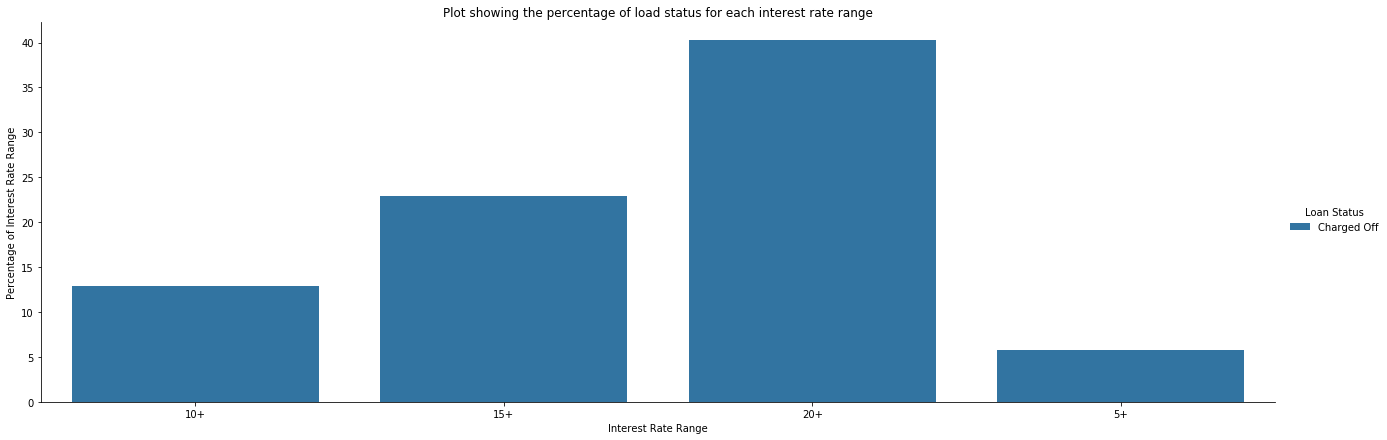

In [45]:
int_rate_sum_analysis=int_rate_analysis.groupby(['Interest Rate Range']).sum().reset_index()
int_rate_sum_analysis.columns=['Interest Rate Range','Total count']
int_rate_perc_analysis=pd.merge(int_rate_analysis,int_rate_sum_analysis,left_on='Interest Rate Range',right_on='Interest Rate Range',how='inner')
int_rate_perc_analysis['Percentage of Interest Rate Range']=(int_rate_perc_analysis['Count of loan status']/int_rate_perc_analysis['Total count'])*100
int_rate_perc_analysis=int_rate_perc_analysis[int_rate_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Interest Rate Range", y="Percentage of Interest Rate Range", hue="Loan Status", kind="bar", data=int_rate_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each interest rate range')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan status for every state code provided

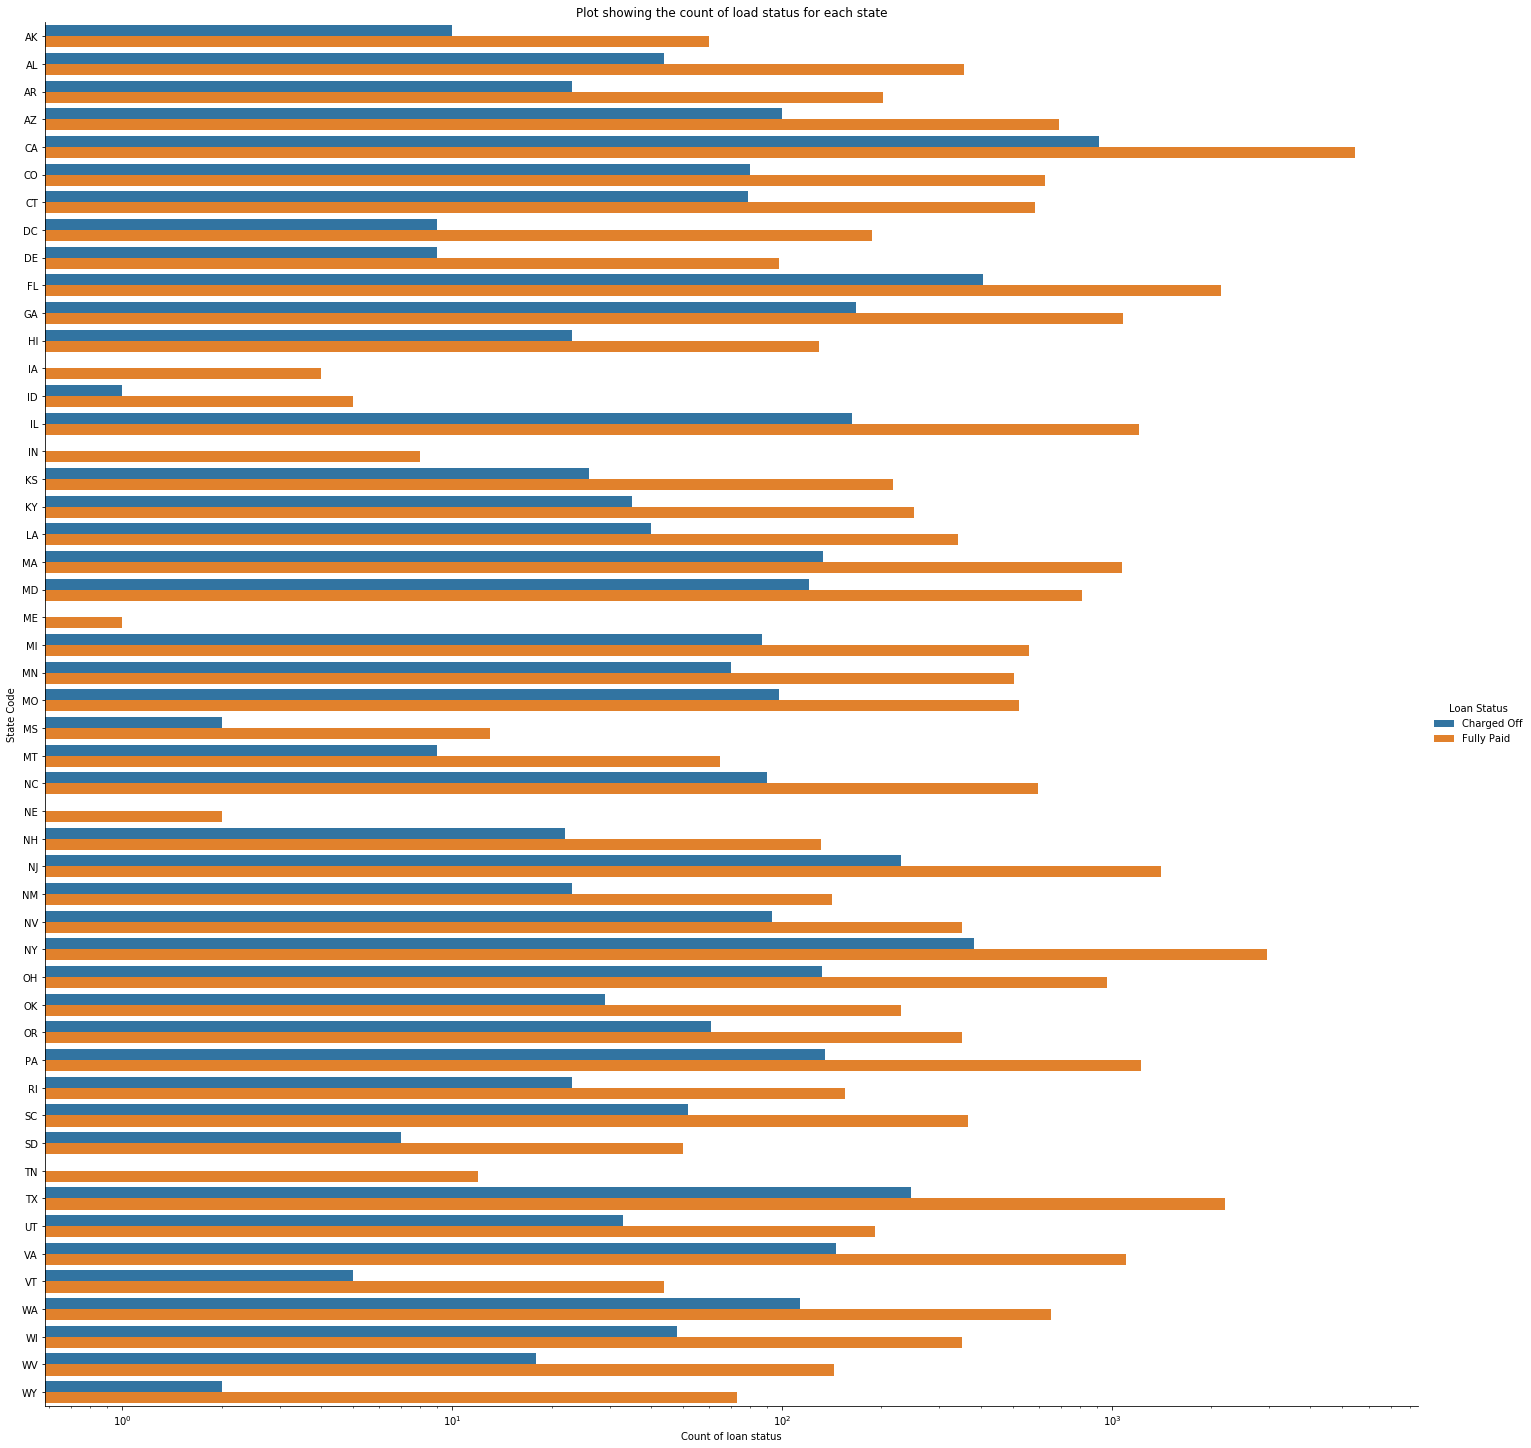

In [46]:
addr_state_analysis=loan_src_df.groupby(['addr_state','loan_status'])['addr_state','loan_status'].agg(['count'])
addr_state_analysis=addr_state_analysis['addr_state'].reset_index()
addr_state_analysis.columns=['State Code','Loan Status','Count of loan status']

ax = sns.catplot(x='Count of loan status',y='State Code',data=addr_state_analysis,hue='Loan Status', kind="bar",size=20,aspect=1,log=True)
plt.title('Plot showing the count of load status for each state')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every state code provided (based on percentage computed with the sub group)

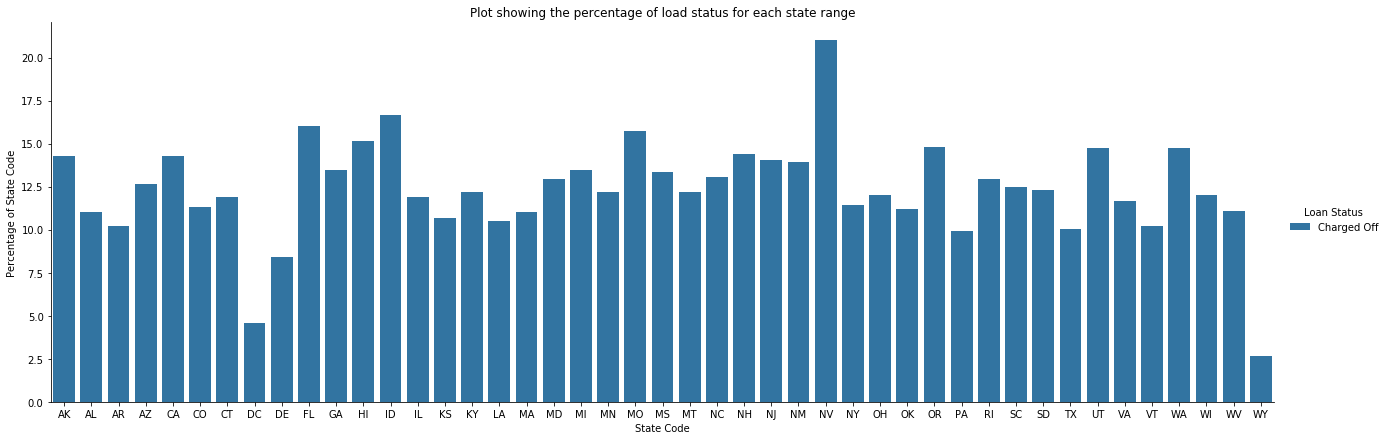

In [47]:
addr_state_sum_analysis=addr_state_analysis.groupby(['State Code']).sum().reset_index()
addr_state_sum_analysis.columns=['State Code','Total count']
addr_state_perc_analysis=pd.merge(addr_state_analysis,addr_state_sum_analysis,left_on='State Code',right_on='State Code',how='inner')
addr_state_perc_analysis['Percentage of State Code']=(addr_state_perc_analysis['Count of loan status']/addr_state_perc_analysis['Total count'])*100
addr_state_perc_analysis=addr_state_perc_analysis[addr_state_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="State Code", y="Percentage of State Code", hue="Loan Status", kind="bar", data=addr_state_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each state range')
plt.show()

Below plot illustrates the record of occurances (based on record count) of charge off loan status for every verification status provided

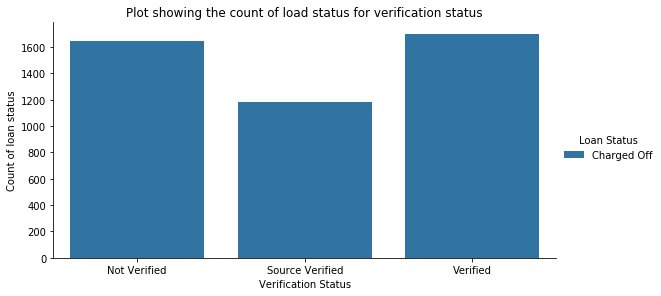

In [48]:
verification_status_analysis=loan_src_df.groupby(['verification_status','loan_status'])['verification_status','loan_status'].agg(['count'])
verification_status_analysis=verification_status_analysis['verification_status'].reset_index()
verification_status_analysis.columns=['Verification Status','Loan Status','Count of loan status']

ax = sns.catplot(x='Verification Status',y='Count of loan status',data=verification_status_analysis.loc[verification_status_analysis['Loan Status']=='Charged Off'],hue='Loan Status', kind="bar",size=4,aspect=2)
plt.title('Plot showing the count of load status for verification status')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every verification status provided (based on percentage computed with the sub group)

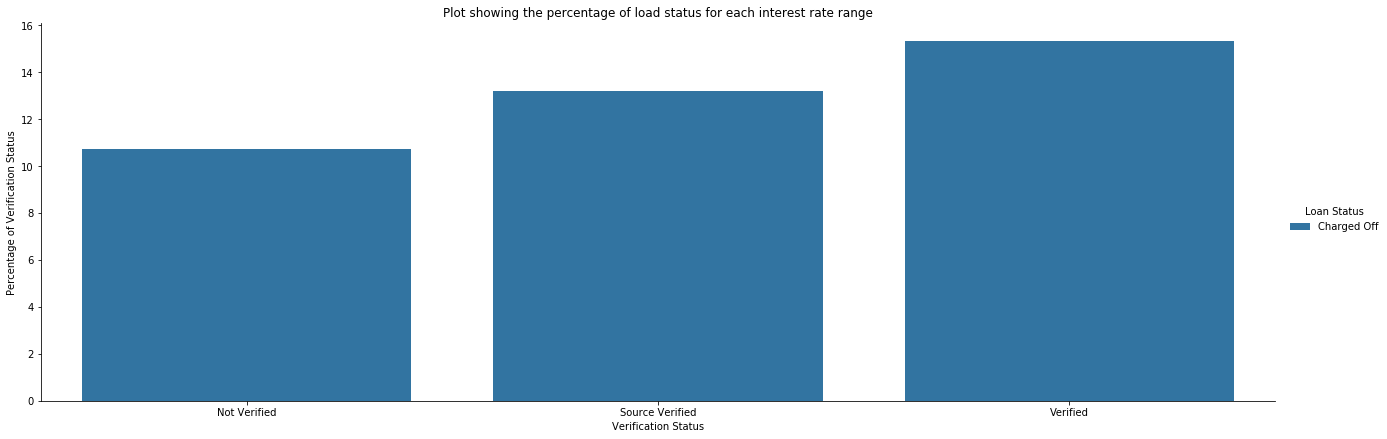

In [49]:
verification_status_sum_analysis=verification_status_analysis.groupby(['Verification Status']).sum().reset_index()
verification_status_sum_analysis.columns=['Verification Status','Total count']
verification_status_perc_analysis=pd.merge(verification_status_analysis,verification_status_sum_analysis,left_on='Verification Status',right_on='Verification Status',how='inner')
verification_status_perc_analysis['Percentage of Verification Status']=(verification_status_perc_analysis['Count of loan status']/verification_status_perc_analysis['Total count'])*100
verification_status_perc_analysis=verification_status_perc_analysis[verification_status_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Verification Status", y="Percentage of Verification Status", hue="Loan Status", kind="bar", data=verification_status_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each interest rate range')
plt.show()

Below plot illustrates the record of occurances (based on record count) of different loan amount range for every employment duration provided

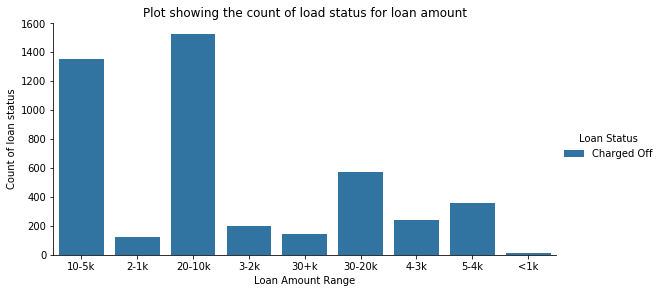

In [50]:
loan_src_df['loan_amount_range']='NA'
loan_src_df.loc[loan_src_df['orig_loan_amnt']>30000,'loan_amount_range']='30+k'
loan_src_df.loc[(loan_src_df['orig_loan_amnt']<=30000) & (loan_src_df['orig_loan_amnt']>20000),'loan_amount_range']='30-20k'
loan_src_df.loc[(loan_src_df['orig_loan_amnt']<=20000) & (loan_src_df['orig_loan_amnt']>10000),'loan_amount_range']='20-10k'
loan_src_df.loc[(loan_src_df['orig_loan_amnt']<=10000) & (loan_src_df['orig_loan_amnt']>5000),'loan_amount_range']='10-5k'
loan_src_df.loc[(loan_src_df['orig_loan_amnt']<=5000) & (loan_src_df['orig_loan_amnt']>4000),'loan_amount_range']='5-4k'
loan_src_df.loc[(loan_src_df['orig_loan_amnt']<=4000) & (loan_src_df['orig_loan_amnt']>3000),'loan_amount_range']='4-3k'
loan_src_df.loc[(loan_src_df['orig_loan_amnt']<=3000) & (loan_src_df['orig_loan_amnt']>2000),'loan_amount_range']='3-2k'
loan_src_df.loc[(loan_src_df['orig_loan_amnt']<=2000) & (loan_src_df['orig_loan_amnt']>1000),'loan_amount_range']='2-1k'
loan_src_df.loc[loan_src_df['orig_loan_amnt']<=1000,'loan_amount_range']='<1k'


loan_amount_range_analysis=loan_src_df.groupby(['loan_amount_range','loan_status'])['loan_amount_range','loan_status'].agg(['count'])
loan_amount_range_analysis=loan_amount_range_analysis['loan_amount_range'].reset_index()
loan_amount_range_analysis.columns=['Loan Amount Range','Loan Status','Count of loan status']

ax = sns.catplot(x='Loan Amount Range',y='Count of loan status',data=loan_amount_range_analysis[loan_amount_range_analysis['Loan Status'] == 'Charged Off'],hue='Loan Status', kind="bar",size=4,aspect=2)
plt.title('Plot showing the count of load status for loan amount')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every loan amount range provided (based on percentage computed with the sub group)

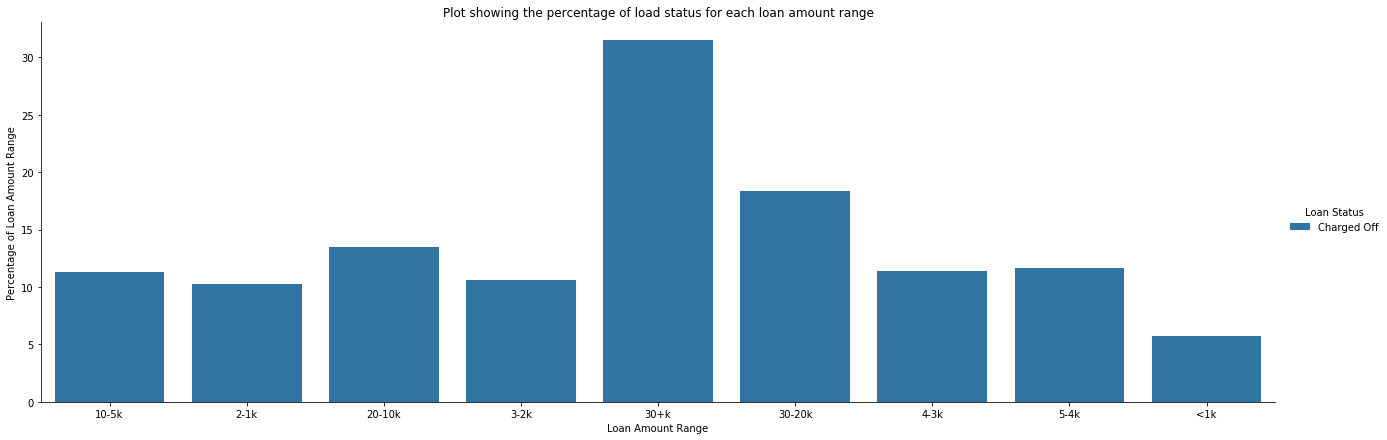

In [51]:
loan_amount_range_sum_analysis=loan_amount_range_analysis.groupby(['Loan Amount Range']).sum().reset_index()
loan_amount_range_sum_analysis.columns=['Loan Amount Range','Total count']
loan_amount_range_perc_analysis=pd.merge(loan_amount_range_analysis,loan_amount_range_sum_analysis,left_on='Loan Amount Range',right_on='Loan Amount Range',how='inner')
loan_amount_range_perc_analysis['Percentage of Loan Amount Range']=(loan_amount_range_perc_analysis['Count of loan status']/loan_amount_range_perc_analysis['Total count'])*100
loan_amount_range_perc_analysis=loan_amount_range_perc_analysis[loan_amount_range_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Loan Amount Range", y="Percentage of Loan Amount Range", hue="Loan Status", kind="bar", data=loan_amount_range_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each loan amount range')
plt.show()

Below plot illustrates the record of occurances (based on record count) of charge off loan status for every annual income range provided

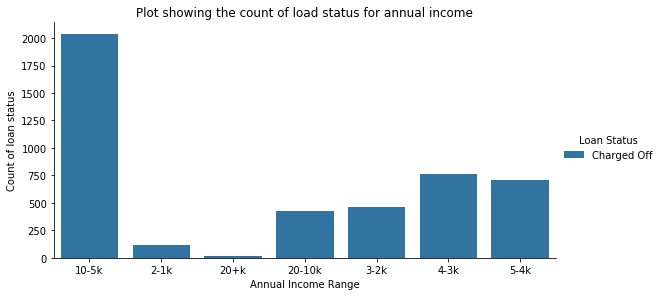

In [52]:
loan_src_df['annual_inc_range']='NA'
loan_src_df.loc[loan_src_df['orig_annual_inc']>200000,'annual_inc_range']='20+k'
loan_src_df.loc[(loan_src_df['orig_annual_inc']<=200000) & (loan_src_df['orig_annual_inc']>100000),'annual_inc_range']='20-10k'
loan_src_df.loc[(loan_src_df['orig_annual_inc']<=100000) & (loan_src_df['orig_annual_inc']>50000),'annual_inc_range']='10-5k'
loan_src_df.loc[(loan_src_df['orig_annual_inc']<=50000) & (loan_src_df['orig_annual_inc']>40000),'annual_inc_range']='5-4k'
loan_src_df.loc[(loan_src_df['orig_annual_inc']<=40000) & (loan_src_df['orig_annual_inc']>30000),'annual_inc_range']='4-3k'
loan_src_df.loc[(loan_src_df['orig_annual_inc']<=30000) & (loan_src_df['orig_annual_inc']>20000),'annual_inc_range']='3-2k'
loan_src_df.loc[(loan_src_df['orig_annual_inc']<=20000) & (loan_src_df['orig_annual_inc']>10000),'annual_inc_range']='2-1k'
loan_src_df.loc[(loan_src_df['orig_annual_inc']<=10000) ,'annual_inc_range']='<1k'

annual_inc_range_analysis=loan_src_df.groupby(['annual_inc_range','loan_status'])['annual_inc_range','loan_status'].agg(['count'])
annual_inc_range_analysis=annual_inc_range_analysis['annual_inc_range'].reset_index()
annual_inc_range_analysis.columns=['Annual Income Range','Loan Status','Count of loan status']

ax = sns.catplot(x='Annual Income Range',y='Count of loan status',data=annual_inc_range_analysis[loan_amount_range_analysis['Loan Status'] == 'Charged Off'],hue='Loan Status', kind="bar",size=4,aspect=2)
plt.title('Plot showing the count of load status for annual income')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every annual income range provided (based on percentage computed with the sub group)

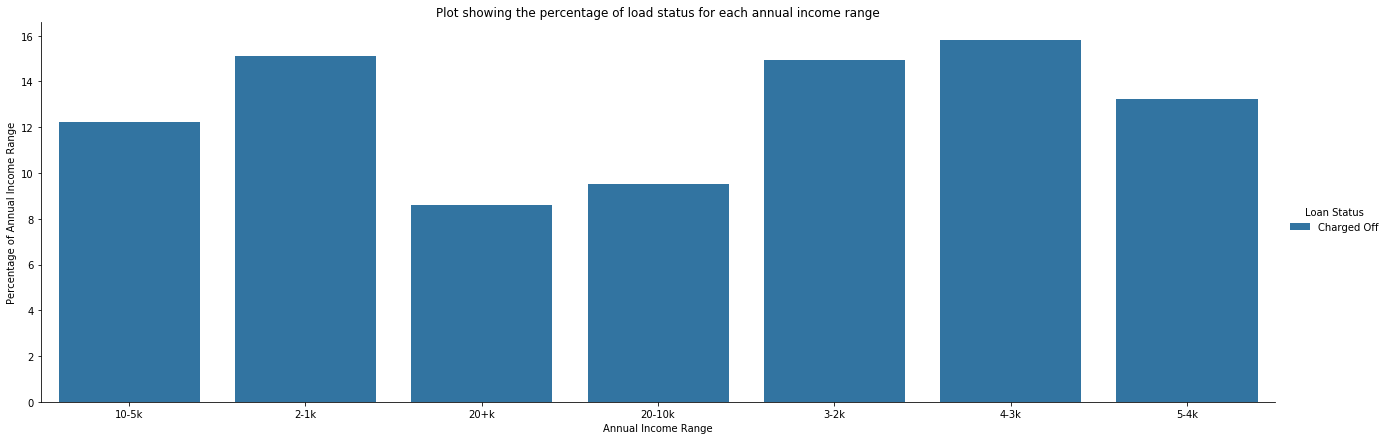

In [53]:
annual_inc_range_sum_analysis=annual_inc_range_analysis.groupby(['Annual Income Range']).sum().reset_index()
annual_inc_range_sum_analysis.columns=['Annual Income Range','Total count']
annual_inc_range_perc_analysis=pd.merge(annual_inc_range_analysis,annual_inc_range_sum_analysis,left_on='Annual Income Range',right_on='Annual Income Range',how='inner')
annual_inc_range_perc_analysis['Percentage of Annual Income Range']=(annual_inc_range_perc_analysis['Count of loan status']/annual_inc_range_perc_analysis['Total count'])*100
annual_inc_range_perc_analysis=annual_inc_range_perc_analysis[annual_inc_range_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Annual Income Range", y="Percentage of Annual Income Range", hue="Loan Status", kind="bar", data=annual_inc_range_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each annual income range')
plt.show()

Below plot illustrates the record of occurances (based on record count) of charge off loan status for every installment range provided

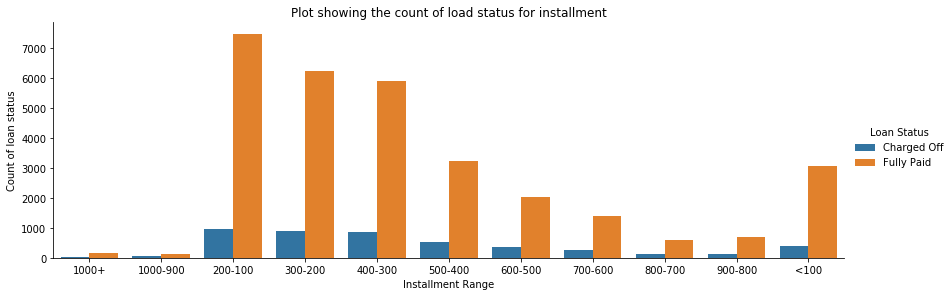

In [54]:
loan_src_df['installment_range']='NA'
#loan_src_df['orig_installment'].min()#15.69
#loan_src_df['orig_installment'].max()#1305.19
loan_src_df.loc[loan_src_df['orig_installment']>1000,'installment_range']='1000+'
loan_src_df.loc[(loan_src_df['orig_installment']<=1000) & (loan_src_df['orig_installment']>900),'installment_range']='1000-900'
loan_src_df.loc[(loan_src_df['orig_installment']<=900) & (loan_src_df['orig_installment']>800),'installment_range']='900-800'
loan_src_df.loc[(loan_src_df['orig_installment']<=800) & (loan_src_df['orig_installment']>700),'installment_range']='800-700'
loan_src_df.loc[(loan_src_df['orig_installment']<=700) & (loan_src_df['orig_installment']>600),'installment_range']='700-600'
loan_src_df.loc[(loan_src_df['orig_installment']<=600) & (loan_src_df['orig_installment']>500),'installment_range']='600-500'
loan_src_df.loc[(loan_src_df['orig_installment']<=500) & (loan_src_df['orig_installment']>400),'installment_range']='500-400'
loan_src_df.loc[(loan_src_df['orig_installment']<=400) & (loan_src_df['orig_installment']>300),'installment_range']='400-300'
loan_src_df.loc[(loan_src_df['orig_installment']<=300) & (loan_src_df['orig_installment']>200),'installment_range']='300-200'
loan_src_df.loc[(loan_src_df['orig_installment']<=200) & (loan_src_df['orig_installment']>100),'installment_range']='200-100'
loan_src_df.loc[loan_src_df['orig_installment']<=100,'installment_range']='<100'

installment_range_analysis=loan_src_df.groupby(['installment_range','loan_status'])['installment_range','loan_status'].agg(['count'])
installment_range_analysis=installment_range_analysis['installment_range'].reset_index()
installment_range_analysis.columns=['Installment Range','Loan Status','Count of loan status']

ax = sns.catplot(x='Installment Range',y='Count of loan status',data=installment_range_analysis,hue='Loan Status', kind="bar",size=4,aspect=3)
plt.title('Plot showing the count of load status for installment')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every installment range provided (based on percentage computed with the sub group)

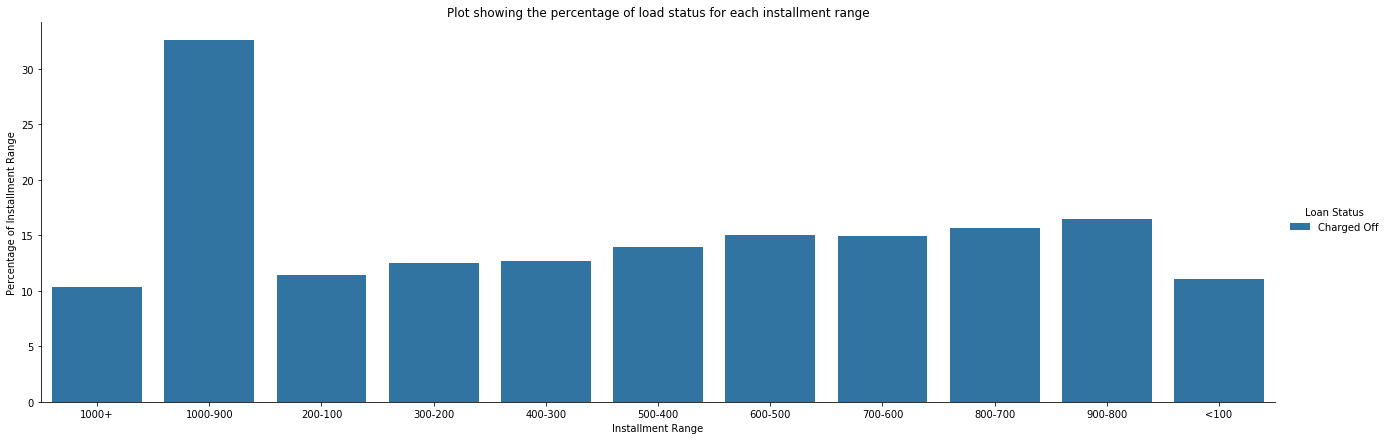

In [55]:
installment_range_sum_analysis=installment_range_analysis.groupby(['Installment Range']).sum().reset_index()
installment_range_sum_analysis.columns=['Installment Range','Total count']
installment_range_perc_analysis=pd.merge(installment_range_analysis,installment_range_sum_analysis,left_on='Installment Range',right_on='Installment Range',how='inner')
installment_range_perc_analysis['Percentage of Installment Range']=(installment_range_perc_analysis['Count of loan status']/installment_range_perc_analysis['Total count'])*100
installment_range_perc_analysis=installment_range_perc_analysis[installment_range_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Installment Range", y="Percentage of Installment Range", hue="Loan Status", kind="bar", data=installment_range_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each installment range')
plt.show()

Below plot illustrates the record of occurances (based on record count) of charge off loan status for every funding percentage range provided

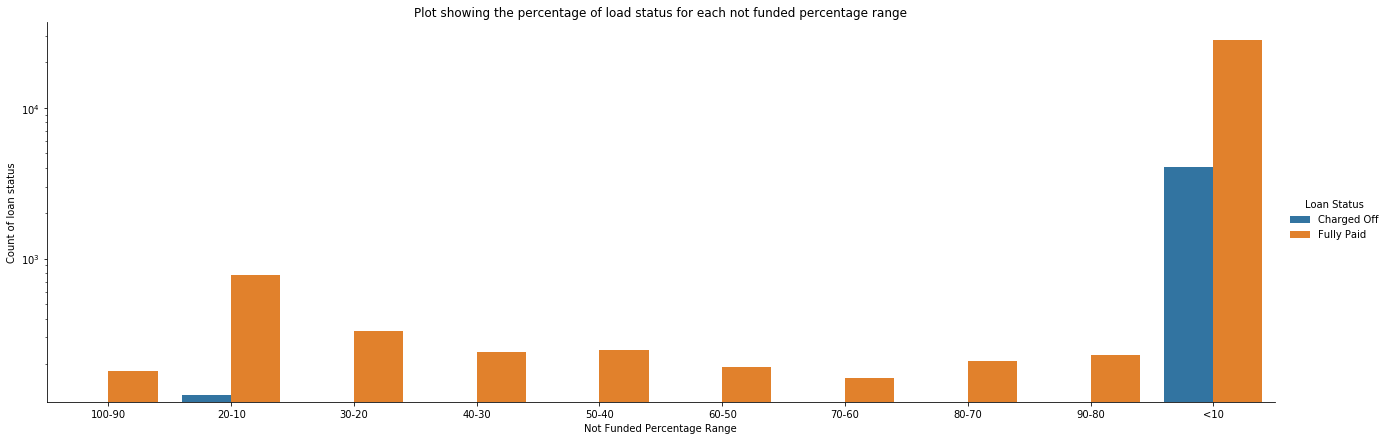

In [56]:
loan_src_df['orig_total_pymnt']=loan_src_df['orig_total_pymnt'].map(lambda x:round(x,2))
loan_src_df['Percentage not funding']=((loan_src_df['orig_total_pymnt']-loan_src_df['orig_total_pymnt_inv'])/loan_src_df['orig_total_pymnt'])*100
loan_src_df['Percentage not funding']=loan_src_df['Percentage not funding'].map(lambda x:round(x,2))
loan_src_df['perc_not_funded_range']='NA'

loan_src_df.loc[(loan_src_df['Percentage not funding']<=100.00) & (loan_src_df['Percentage not funding']>90.00),'perc_not_funded_range']='100-90'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=90.00) & (loan_src_df['Percentage not funding']>80.00),'perc_not_funded_range']='90-80'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=80.00) & (loan_src_df['Percentage not funding']>70.00),'perc_not_funded_range']='80-70'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=70.00) & (loan_src_df['Percentage not funding']>60.00),'perc_not_funded_range']='70-60'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=60.00) & (loan_src_df['Percentage not funding']>50.00),'perc_not_funded_range']='60-50'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=50.00) & (loan_src_df['Percentage not funding']>40.00),'perc_not_funded_range']='50-40'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=40.00) & (loan_src_df['Percentage not funding']>30.00),'perc_not_funded_range']='40-30'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=30.00) & (loan_src_df['Percentage not funding']>20.00),'perc_not_funded_range']='30-20'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=20.00) & (loan_src_df['Percentage not funding']>10.00),'perc_not_funded_range']='20-10'
loan_src_df.loc[(loan_src_df['Percentage not funding']<=10.00),'perc_not_funded_range']='<10'



funding_perc_range_analysis=loan_src_df.groupby(['perc_not_funded_range','loan_status'])['perc_not_funded_range','loan_status'].agg(['count'])
funding_perc_range_analysis=funding_perc_range_analysis['perc_not_funded_range'].reset_index()
funding_perc_range_analysis.columns=['Not Funded Percentage Range','Loan Status','Count of loan status']

sns.catplot(x="Not Funded Percentage Range", y="Count of loan status", hue="Loan Status", kind="bar", data=funding_perc_range_analysis,size=6,aspect=3,log=True)
plt.title('Plot showing the percentage of load status for each not funded percentage range')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every funding percentage range provided (based on percentage computed with the sub group)

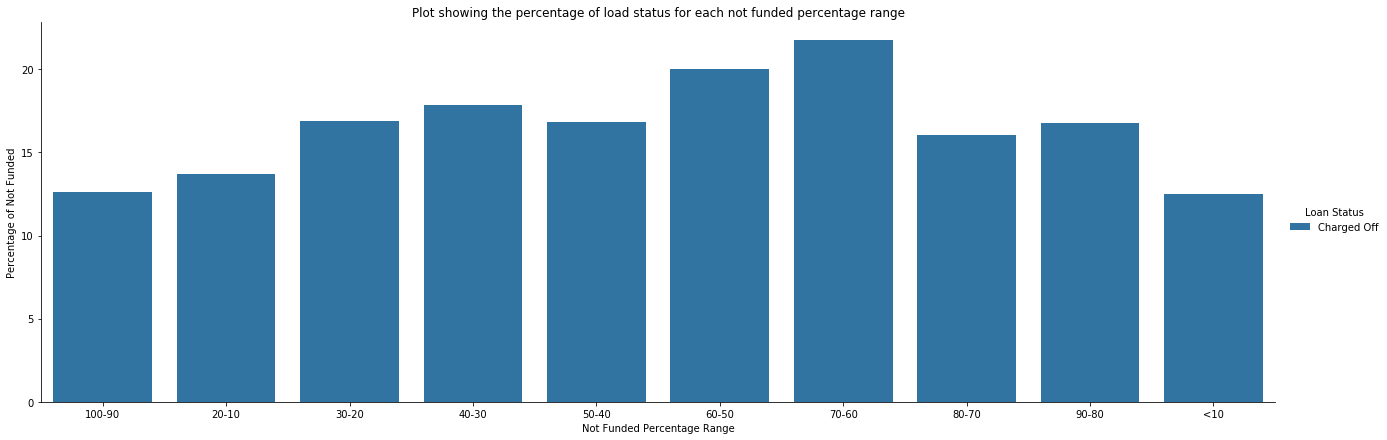

In [57]:
funding_perc_range_sum_analysis=funding_perc_range_analysis.groupby(['Not Funded Percentage Range']).sum().reset_index()
funding_perc_range_sum_analysis.columns=['Not Funded Percentage Range','Total count']
funding_perc_range_perc_analysis=pd.merge(funding_perc_range_analysis,funding_perc_range_sum_analysis,left_on='Not Funded Percentage Range',right_on='Not Funded Percentage Range',how='inner')
funding_perc_range_perc_analysis['Percentage of Not Funded']=(funding_perc_range_perc_analysis['Count of loan status']/funding_perc_range_perc_analysis['Total count'])*100
funding_perc_range_perc_analysis=funding_perc_range_perc_analysis[funding_perc_range_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="Not Funded Percentage Range", y="Percentage of Not Funded", hue="Loan Status", kind="bar", data=funding_perc_range_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each not funded percentage range')
plt.show()

Below plot illustrates the record of occurances (based on record count) of charge off loan status for every dti range provided

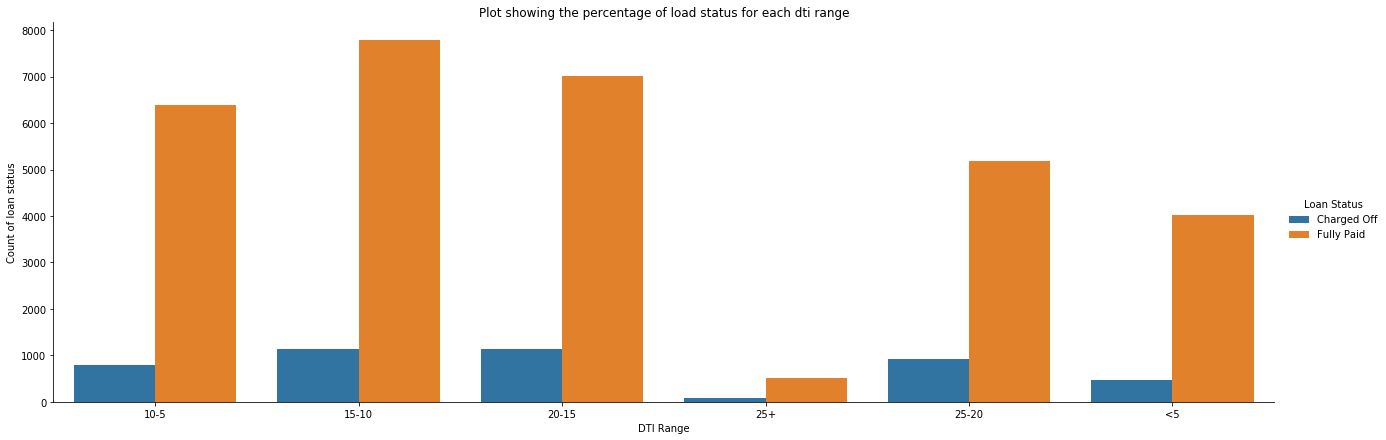

In [58]:
#loan_src_df['dti'].min()
#loan_src_df['dti'].max()
loan_src_df['dti_range']='NA'
loan_src_df.loc[loan_src_df['dti']>25,'dti_range']='25+'
loan_src_df.loc[(loan_src_df['dti']<=25) &  (loan_src_df['dti']>20),'dti_range']='25-20'
loan_src_df.loc[(loan_src_df['dti']<=20) &  (loan_src_df['dti']>15),'dti_range']='20-15'
loan_src_df.loc[(loan_src_df['dti']<=15) &  (loan_src_df['dti']>10),'dti_range']='15-10'
loan_src_df.loc[(loan_src_df['dti']<=10) &  (loan_src_df['dti']>5),'dti_range']='10-5'
loan_src_df.loc[(loan_src_df['dti']<=5),'dti_range']='<5'

dti_range_analysis=loan_src_df.groupby(['dti_range','loan_status'])['dti_range','loan_status'].agg(['count'])
dti_range_analysis=dti_range_analysis['dti_range'].reset_index()
dti_range_analysis.columns=['DTI Range','Loan Status','Count of loan status']

sns.catplot(x="DTI Range", y="Count of loan status", hue="Loan Status", kind="bar", data=dti_range_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each dti range')
plt.show()

Below plot illustrates the record of occurances of charge off loan status for every dti range provided (based on percentage computed with the sub group)

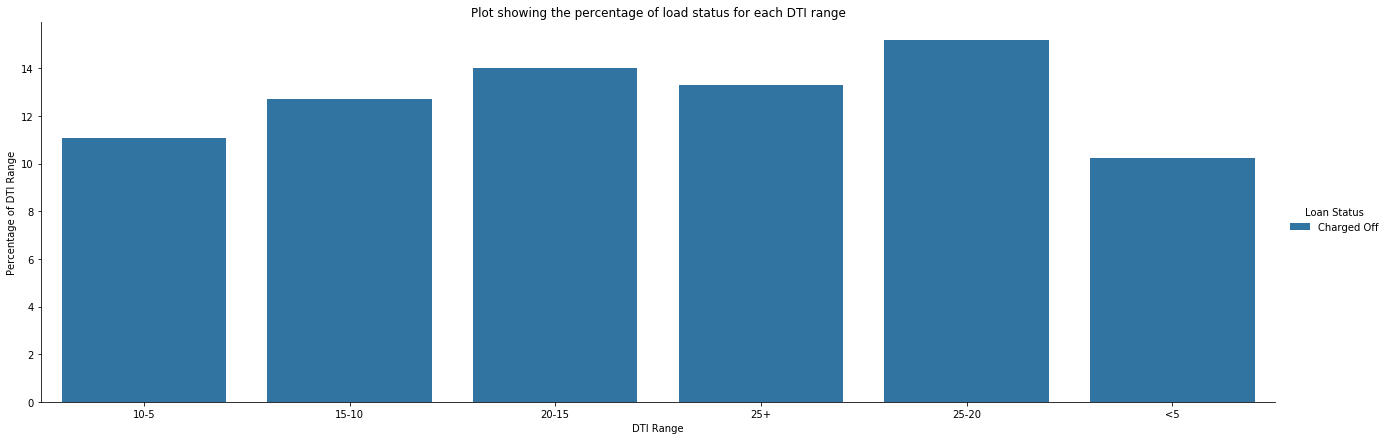

In [59]:
dti_range_sum_analysis=dti_range_analysis.groupby(['DTI Range']).sum().reset_index()
dti_range_sum_analysis.columns=['DTI Range','Total count']
dti_range_perc_analysis=pd.merge(dti_range_analysis,dti_range_sum_analysis,left_on='DTI Range',right_on='DTI Range',how='inner')
dti_range_perc_analysis['Percentage of DTI Range']=(dti_range_perc_analysis['Count of loan status']/dti_range_perc_analysis['Total count'])*100
dti_range_perc_analysis=dti_range_perc_analysis[dti_range_perc_analysis['Loan Status']=='Charged Off']

sns.catplot(x="DTI Range", y="Percentage of DTI Range", hue="Loan Status", kind="bar", data=dti_range_perc_analysis,size=6,aspect=3)
plt.title('Plot showing the percentage of load status for each DTI range')
plt.show()

#### Bivarate Analysis - Between Categorical variable
Below we have a cross tab to study the count distribution between loan amount range and loan grade

In [60]:
pd.crosstab(loan_src_df['loan_amount_range'],loan_src_df['grade'])

grade,A,B,C,D,E,F,G
loan_amount_range,,,,,,,
10-5k,4065,3554,2294,1425,514,132,27
2-1k,366,373,290,113,24,9,2
20-10k,2425,3636,2337,1624,914,330,83
3-2k,609,599,393,189,64,21,3
30+k,44,105,100,68,100,39,11
30-20k,232,983,591,531,456,245,98
4-3k,717,614,428,234,84,18,1
5-4k,1050,946,597,341,120,26,11
<1k,90,78,53,17,5,0,0


For the above constructed cross tab heat map is constructed to undertand the count distribution based on color

Text(0.5, 1, 'Heat Map showing the count distribution of loan amount with grade')

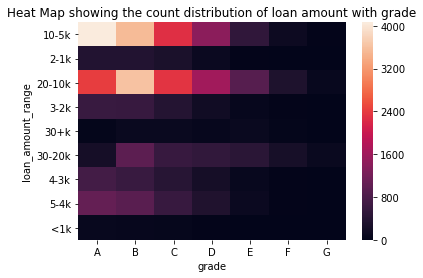

In [61]:
sns.heatmap(pd.crosstab(loan_src_df['loan_amount_range'],loan_src_df['grade']))
plt.title('Heat Map showing the count distribution of loan amount with grade')

Below we have a cross tab to study the count distribution between loan amount range and loan status

In [62]:
pd.crosstab(loan_src_df['loan_amount_range'],loan_src_df['loan_status'])

loan_status,Charged Off,Fully Paid
loan_amount_range,,
10-5k,1357,10654
2-1k,121,1056
20-10k,1526,9823
3-2k,199,1679
30+k,147,320
30-20k,575,2561
4-3k,239,1857
5-4k,360,2731
<1k,14,229


For the above constructed cross tab heat map is constructed to undertand the count distribution based on color

Text(0.5, 1, 'Heat Map showing the count distribution of loan amount with loan status')

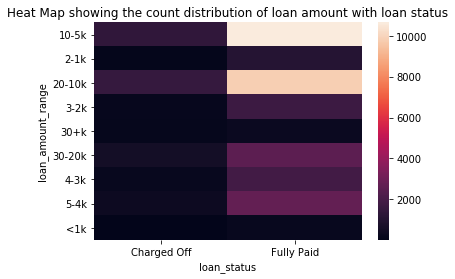

In [63]:
sns.heatmap(pd.crosstab(loan_src_df['loan_amount_range'],loan_src_df['loan_status']))
plt.title('Heat Map showing the count distribution of loan amount with loan status')

Below we have a cross tab to study the count distribution between annual income range and loan status

In [64]:
pd.crosstab(loan_src_df['annual_inc_range'],loan_src_df['loan_status'])

loan_status,Charged Off,Fully Paid
annual_inc_range,,
10-5k,2041,14644
2-1k,118,662
20+k,17,181
20-10k,430,4084
3-2k,466,2656
4-3k,759,4047
5-4k,707,4636


For the above constructed cross tab heat map is constructed to undertand the count distribution based on color

Text(0.5, 1, 'Heat Map showing the count distribution of annual income with grade')

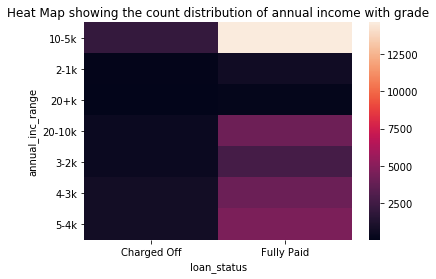

In [65]:
sns.heatmap(pd.crosstab(loan_src_df['annual_inc_range'],loan_src_df['loan_status']))
plt.title('Heat Map showing the count distribution of annual income with grade')

Below we have a cross tab to study the count distribution between annual income range and verification status

In [66]:
pd.crosstab(loan_src_df['annual_inc_range'],loan_src_df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
annual_inc_range,,,
10-5k,6879,3979,5827
2-1k,418,213,149
20+k,35,55,108
20-10k,1282,1058,2174
3-2k,1647,880,595
4-3k,2469,1337,1000
5-4k,2637,1457,1249


For the above constructed cross tab heat map is constructed to undertand the count distribution based on color

Text(0.5, 1, 'Heat Map showing the count distribution of annual income with verification status')

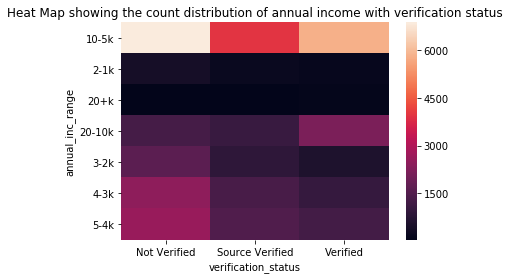

In [67]:
sns.heatmap(pd.crosstab(loan_src_df['annual_inc_range'],loan_src_df['verification_status']))
plt.title('Heat Map showing the count distribution of annual income with verification status')

Below we have a cross tab to study the count distribution between employment duration and verification status

In [68]:
pd.crosstab(loan_src_df['emp_length'],loan_src_df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
emp_length,,,
1 year,1378,740,750
10+ years,3401,1904,3426
2 years,1885,999,1075
3 years,1685,947,1079
4 years,1353,777,960
5 years,1301,751,897
6 years,872,519,643
7 years,675,408,519
8 years,562,319,420


For the above constructed cross tab heat map is constructed to undertand the count distribution based on color

Text(0.5, 1, 'Heat Map showing the count distribution of employee duration with grade')

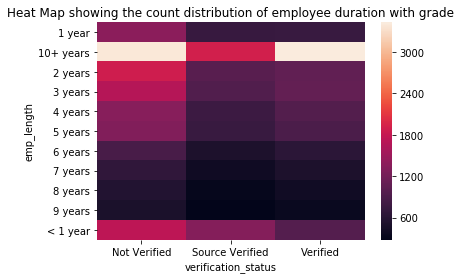

In [69]:
sns.heatmap(pd.crosstab(loan_src_df['emp_length'],loan_src_df['verification_status']))
plt.title('Heat Map showing the count distribution of employee duration with grade')

Below we have a correlation metrics to understand the relation between the variables

In [70]:
loan_src_corr_df=loan_src_df[['loan_amnt','term','int_rate','installment','annual_inc','loan_status','purpose','dti','pub_rec','total_acc','total_pymnt','total_pymnt_inv','last_pymnt_amnt','pub_rec_bankruptcies']]
loan_src_corr_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,pub_rec,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.256510,0.954105,0.412885,0.073075,-0.048072,0.235750,0.871853,0.817999,0.421143,-0.030820
int_rate,0.256510,1.000000,0.245049,0.047425,0.115839,0.105122,-0.060305,0.224795,0.218071,0.119465,0.089563
installment,0.954105,0.245049,1.000000,0.406781,0.063980,-0.042946,0.208817,0.859748,0.800188,0.386110,-0.028245
annual_inc,0.412885,0.047425,0.406781,1.000000,-0.095055,-0.013237,0.401142,0.390481,0.367905,0.215474,-0.009291
dti,0.073075,0.115839,0.063980,-0.095055,1.000000,-0.007237,0.229721,0.059808,0.068482,0.014558,0.005775
pub_rec,-0.048072,0.105122,-0.042946,-0.013237,-0.007237,1.000000,-0.022832,-0.055860,-0.055595,-0.033040,0.842270
total_acc,0.235750,-0.060305,0.208817,0.401142,0.229721,-0.022832,1.000000,0.202717,0.196759,0.159471,-0.008717
total_pymnt,0.871853,0.224795,0.859748,0.390481,0.059808,-0.055860,0.202717,1.000000,0.949426,0.481252,-0.043717
total_pymnt_inv,0.817999,0.218071,0.800188,0.367905,0.068482,-0.055595,0.196759,0.949426,1.000000,0.470075,-0.041833
last_pymnt_amnt,0.421143,0.119465,0.386110,0.215474,0.014558,-0.033040,0.159471,0.481252,0.470075,1.000000,-0.019312


Based on the above correlation matrix below heat map is constructed, it will very easy to understand the relationship with the color

Text(0.5, 1, 'Heat Map showing the co variance between multiple continuous variables')

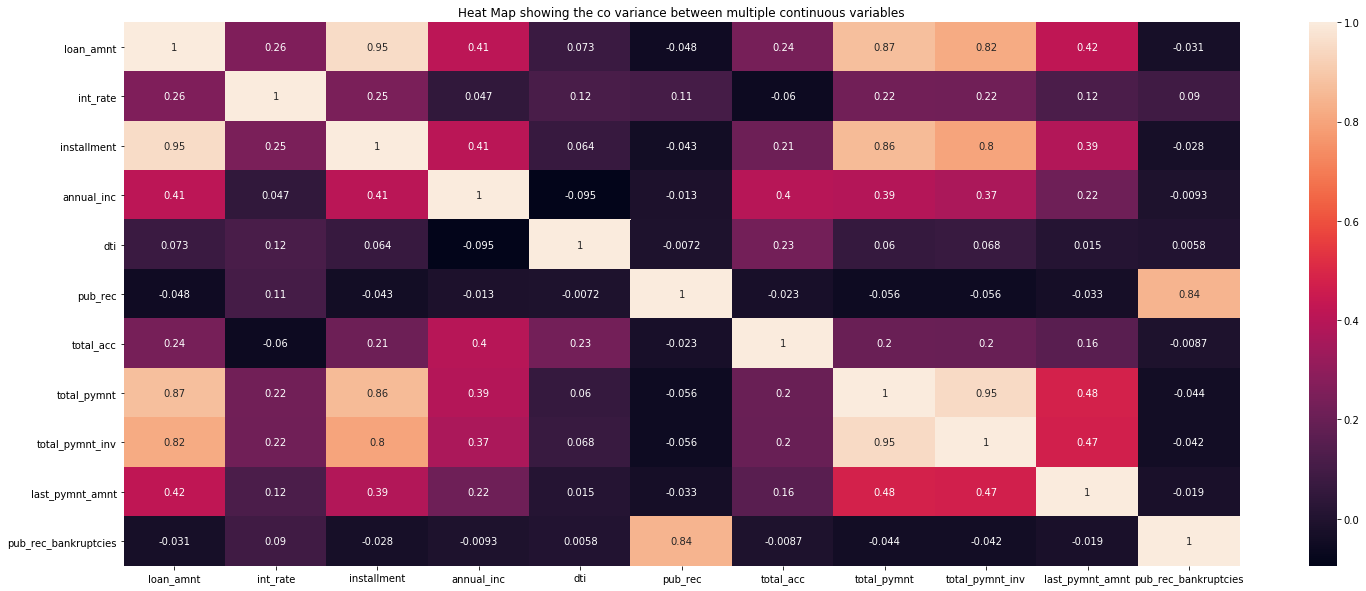

In [71]:
plt.figure(figsize=(25, 10))
sns.heatmap(loan_src_corr_df.corr(),annot=True)
plt.title('Heat Map showing the co variance between multiple continuous variables')

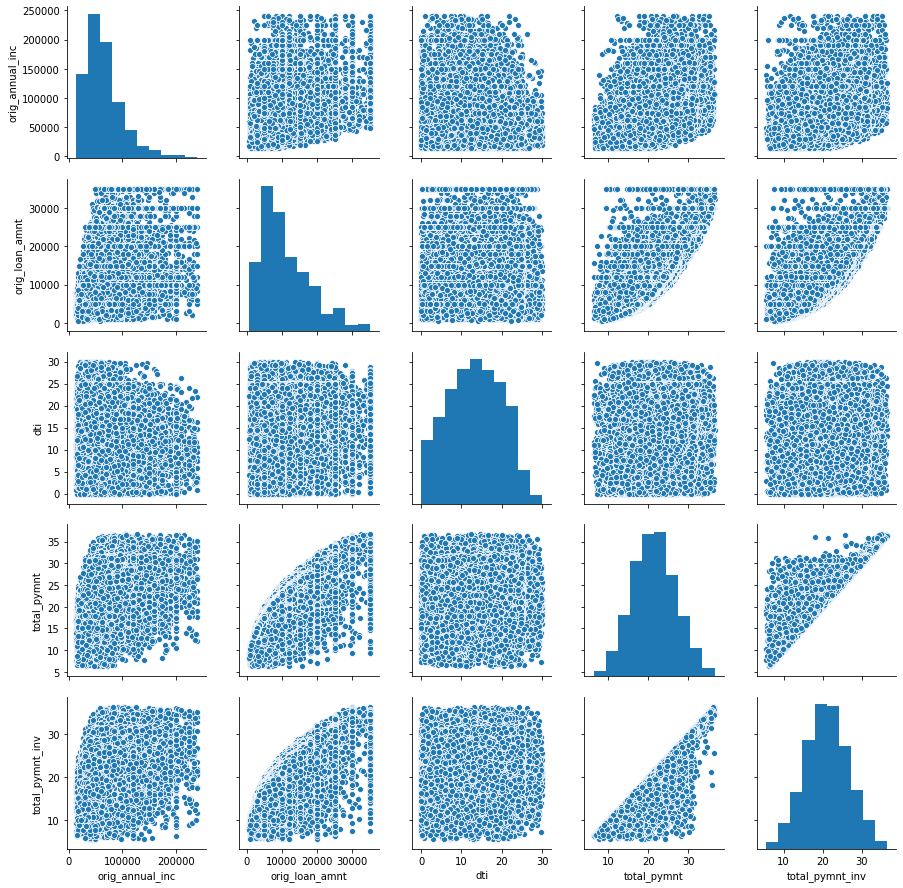

In [72]:
ax=sns.pairplot(loan_src_df[['orig_annual_inc','orig_loan_amnt','dti','total_pymnt','total_pymnt_inv']])